# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data_Analyst_Intern_Technocolabs/Bondora_raw.csv',low_memory=False)

In [ ]:
df.shape

(134529, 112)

In [ ]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [ ]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

# Percentage of Missing Values

In [ ]:
# To show all the rows of pandas dataframe
missing_data = df.isnull().sum() / len(df)
missing_data

ReportAsOfEOD                             0.000000
LoanId                                    0.000000
LoanNumber                                0.000000
ListedOnUTC                               0.000000
BiddingStartedOn                          0.000000
BidsPortfolioManager                      0.000000
BidsApi                                   0.000000
BidsManual                                0.000000
UserName                                  0.000000
NewCreditCustomer                         0.000000
LoanApplicationStartedDate                0.000000
LoanDate                                  0.000000
ContractEndDate                           0.561559
FirstPaymentDate                          0.000000
MaturityDate_Original                     0.000000
MaturityDate_Last                         0.000000
ApplicationSignedHour                     0.000000
ApplicationSignedWeekday                  0.000000
VerificationType                          0.000335
LanguageCode                   

Removing all the features which have more than 40% missing values

In [ ]:
# removing the columns having more than 40% missing values
missing_cols = missing_data[missing_data.values > 0.4].index
missing_cols

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')

In [ ]:
# print missing values columns 
missing_cols = missing_cols.tolist()
missing_cols.remove('DefaultDate')
missing_cols

['ContractEndDate',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [ ]:
# drop missing  values columns )
df.drop(missing_cols, axis=1, inplace=True)
df.shape

(134529, 77)

- Apart from missing value features there are some features which will have no role in default prediction like,
1. 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**),
2. 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**),
3. 'LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince', 'ModelVersion','WorseLateCategory'.

In [ ]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [ ]:
df.drop(cols_del,axis=1, inplace=True)
df.shape

(134529, 48)

# Creating Target Variable

- Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**.
- There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted.
- So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
- So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [ ]:
# let's find the counts of each status categories
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [ ]:
# filtering out Current Status records
df = df[df['Status']=='Current']

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [ ]:
# write your code here
df['defaulted'] = df['DefaultDate'].map(lambda x: 0 if pd.isna(x) else 1) 

In [ ]:
# check the counts of default and nondefault
df['defaulted'].value_counts() 

0    57014
1      121
Name: defaulted, dtype: int64

Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [ ]:
# let's drop the status columns
df.drop(['Status', 'DefaultDate'], axis=1, inplace=True)

In [ ]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,defaulted
491,1355,0,645.0,True,2015-01-06,2015-02-16,2020-01-15,2021-01-15,3.0,4,28,0.0,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,7,5.0,2.0,3.0,UpTo2Years,6.0,1.0,2097.0,1,629.00,0,3.05,1404.10,15,2020-01-17,D,True,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0,0
523,1000,0,0.0,False,2015-01-07,2015-03-06,2020-02-06,2021-11-08,4.0,1,27,0.0,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,7,4.0,3.0,3.0,UpTo1Year,1.0,6.0,560.0,8,1327.37,2,47.56,43.67,6,2020-01-08,B,True,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0,0
536,2345,0,655.0,False,2015-01-07,2015-02-16,2020-01-14,2024-02-23,3.0,1,29,0.0,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,7,2.0,3.0,3.0,UpTo3Years,3.0,3.0,745.0,4,427.03,0,27.48,290.28,14,2020-01-23,B,True,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0,0
541,2045,0,955.0,True,2015-01-08,2015-02-20,2020-01-20,2021-01-04,3.0,4,25,0.0,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,0,3.0,3.0,3.0,UpTo5Years,10.0,4.0,1530.0,4,955.00,0,36.41,472.88,27,2020-01-20,D,True,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0,0
544,1500,0,0.0,True,2015-01-08,2015-02-25,2020-01-27,2020-01-27,1.0,1,30,0.0,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,7,4.0,2.0,5.0,MoreThan5Years,5.0,3.0,1500.0,2,465.00,0,4.52,982.16,25,2019-12-27,D,False,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0,0


In [ ]:
df.shape

(57135, 47)

# checking datatype of all features
In this step we will see any data type mismatch

In [ ]:
# write your code here
num_cols = df.select_dtypes([int, float]).columns.tolist()
cat_cols = df.select_dtypes(['O']).columns.tolist()
bool_cols = df.select_dtypes([bool]).columns.tolist()

# Check missing cols
len(num_cols)+len(cat_cols)+len(bool_cols) == df.shape[1]

True

Checking distribution of categorical variables

In [ ]:
# write your code here
for col in cat_cols:
  print(f'{col} has {df[col].nunique()} unique values:')
  print(df[col].unique())
  print('*'*40)

LoanDate has 1905 unique values:
['2015-01-06' '2015-01-07' '2015-01-08' ... '2014-12-30' '2015-01-02'
 '2015-01-03']
****************************************
FirstPaymentDate has 1162 unique values:
['2015-02-16' '2015-03-06' '2015-02-20' ... '2015-01-20' '2015-02-06'
 '2015-02-12']
****************************************
MaturityDate_Original has 1462 unique values:
['2020-01-15' '2020-02-06' '2020-01-14' ... '2025-01-21' '2025-01-27'
 '2025-01-24']
****************************************
MaturityDate_Last has 1151 unique values:
['2021-01-15' '2021-11-08' '2024-02-23' ... '2021-01-06' '2020-07-07'
 '2020-07-17']
****************************************
Country has 4 unique values:
['FI' 'EE' 'ES' 'SK']
****************************************
County has 287 unique values:
['POHJOIS-SAVO' 'LÄÄNE-VIRUMAA' 'PÄRNUMAA' 'TARTU' 'CASTILLA Y LEÓN'
 'KUOPIO' 'BARCELONA' 'HARJU' 'ETELÄ-POHJANMAA' 'SAARE' 'VASARAINEN'
 'KYMENLAAKSO' 'PIRKANMAA' 'POHJANMAA' 'JÕGEVAMAA' 'VILJANDI' 'JÕGEVA'
 'M

**We can see that:** There're date attributes in categorical form --> Identify and drop them, as they're not relevant to our analysis.


In [ ]:
# Categorical columns that're date in nature
date_cols = ['LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'LastPaymentOn']

# drop them
df.drop(date_cols, axis=1, inplace=True)

checking distribution of all numeric columns

In [ ]:
# write your code here
for col in num_cols:
  print(f'{col} has {df[col].nunique()} unique values:')
  print(df[col].unique())
  print('*'*40)

BidsPortfolioManager has 4061 unique values:
[1355 1000 2345 ... 2656 4310 2269]
****************************************
BidsApi has 772 unique values:
[   0   10   20   65  125   40   55   80  685   60  430   25    5  135
  190  235   75  150  120  170  195  725  175  260  375  215  145  530
   90  400  505   45  930  200  590  475 3505  515  255  180  115  585
  680  305   35  105  225  185  315  130  240  110  160  555  645  540
  445  385   15  100  600  165  220  320  710 3790  480  365   50  415
  295 1650  870   70  405  245  745   30  915 1160  360 5565  250   95
  340 2620  290  550 3475  275 1015 2605  230  210  410 1035 1165  830
  270  520  205  280  300  790  285  850 2120  370 1225  560  580  420
  485  330  620 1375  265  825 1060  155  535  440  350  355  615  310
 1790  460  345  380  640  495  335  425  395  390  545  140  325  525
  695  775 1155 2050  655  500 1845 1315  760 2190  690  770 1055  635
 1085   85  855  510 1915  610  980  955  570 1770  455  465  840 


- **We can see** in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc. --> So we will convert these features to categorical features.

- **Also**, there're columns that has values out of its ecoding range, like MatrialStatus, Education, LanguageCode, etc. --> Handle these to follow under the specified encoding.

In [ ]:
# VerificationType
code = {0:'NotSet', 1: 'Income_unverified', 
        2: 'Income_unverified_cross_referenced_by_phone',
       3: 'Income verified', 4: 'Income_and_expenses_verified'}
df['VerificationType'] = df['VerificationType'].apply(lambda x: code[x])

In [ ]:
# Gender
code = {0: 'Male', 1:'Woman', 2: 'Undefined'}
df['Gender'] = df['Gender'].apply(lambda x: code[x])

In [ ]:
# LanguageCode
code = {1: 'Estonian', 2: 'English', 3: 'Russian', 4: 'Finnish',
       5: 'German', 6: 'Spanish', 9: 'Slovakian'}
df['LanguageCode'] = df['LanguageCode'].apply(lambda x: code[x])

In [ ]:
# UseOfLoan
code = {0: 'Loan_consolidation', 1: 'Real_estate', 2: 'Home_improvement', 3: 'Business',
        4: 'Education', 5: 'Travel', 6: 'Vehicle', 7: 'Other', 8: 'Health', 101: 'Working_capital_financing',
        102: 'Purchase_of_machinery_equipment', 103: 'Renovation_of_real_estate', 104: 'Accounts_receivable_financing',
        105: 'Acquisition_of_means_of_transport', 106: 'Construction_finance', 107: 'Acquisition_of_stocks',
        108: 'Acquisition_of_real_estate', 109: 'Guaranteeing_obligation', 110: 'Other_business', -1: 'Not_set'} 
df['UseOfLoan'] = df['UseOfLoan'].apply(lambda x: code[x])

- As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category.

In [ ]:
df['Education'].value_counts()

 4.0    22773
 5.0    14479
 3.0    12003
 1.0     6831
 2.0     1048
-1.0        1
Name: Education, dtype: int64

- Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [ ]:
# Education
code = {1: 'Primary_education', 2: 'Basic_education', 3: 'Vocational_education',
        4: 'Secondary_education', 5: 'Higher_education', -1: 'Undefined'}
df['Education'] = df['Education'].apply(lambda x: code[x])

In [ ]:
df['MaritalStatus'].value_counts()

-1.0    53769
 1.0     1167
 2.0      921
 3.0      896
 4.0      300
 5.0       82
Name: MaritalStatus, dtype: int64

- Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [ ]:
# MaritalStatus
code = {1: 'Married', 2: 'Cohabitant', 3: 'Single', 4: 'Divorced', 5: 'Widow', -1:'Not_specified'}
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: code[x])

In [ ]:
# EmploymentStatus
code = {1: 'Unemployed', 2: 'Partially_employed', 3: 'Fully_employed', 4: 'Self-employed',
        5: 'Entrepreneur', 6: 'Retiree', -1: 'Not_specified'}
df['EmploymentStatus'] = df['EmploymentStatus'].apply(lambda x: code[x])

In [ ]:
# NewCreditCustome
code = {0: 'at_least_3_months_of_credit_history', 1: 'No_prior_credit_history'}
df['NewCreditCustomer'] = df['NewCreditCustomer'].apply(lambda x: code[x])

In [ ]:
# Restructured
code = {0: 'Unstructured', 1: 'Structured'}
df['Restructured'] = df['Restructured'].apply(lambda x: code[x])

In [ ]:
# OccupationArea
code = {1: 'Other', 2: 'Mining', 3: 'Processing', 4: 'Energy', 5: 'Utilities', 6: 'Construction',
        7: 'Retail_wholesale', 8: 'Transport_warehousing', 9: 'Hospitality_catering', 10: 'Info_telecom',
        11: 'Finance_insurance', 12: 'Real-estate', 13: 'Research', 14: 'Administrative', 15: 'Civil_service&military',
        16: 'Education', 17: 'Healthcare_social_help', 18: 'Art_entertainment', 19: 'Agriculture_forestry_fishing',
       -1:'Not_specified'}
df['OccupationArea'] = df['OccupationArea'].apply(lambda x: code[x])

In [ ]:
# HomeOwnershipType
code = {0: 'Homeless', 1: 'Owner', 2: 'Living_with_parents', 3: 'Tenant_pre-furnished_property',
        4: 'Tenant_unfurnished_property', 5: 'Council_house', 6: 'Joint tenant', 7: 'Joint ownership', 8: 'Mortgage',
        9: 'Owner_with_encumbrance', 10: 'Other', -1: 'Not_specified'}
df['HomeOwnershipType'] = df['HomeOwnershipType'].apply(lambda x:code[x])

In [ ]:
# save the dataset after preprocessing stage
df.to_csv('/content/drive/MyDrive/Data_Analyst_Intern_Technocolabs/Bondora_preprocessed.csv',index=False)

# Explatory Data Analysis (EDA):

In [ ]:
# Redefine cat_cols and num_cols to reflect the last changes made in the data preprocessing stage
cat_cols = df.select_dtypes(['O']).columns.tolist()
num_cols = df.select_dtypes([int, float]).columns.tolist()

# check #columns
len(cat_cols) + len(num_cols) == df.shape[1]

True

## Categorical Features Analysis:
- Checking both the individual distriburtion of every categorical analysis, and its relation to 'default' column (the target attribute).

In [ ]:
def plot_uni_cat(col):
  #plt.figure(figsize=(15,5))
  if df[col].isnull().sum() == 0:
    sns.barplot(data=df, x = df[col].value_counts().values, y=df[col].value_counts().index, color='darkblue') #palette='mako'
  else:
    sns.barplot(data=df, x = df[col].dropna().value_counts().values, y=df[col].dropna().value_counts().index, color='darkblue') #palette='mako'
  plt.title(str.title(col)+" Distribution")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

Column Description:
 count                       57135
unique                          2
top       No_prior_credit_history
freq                        28941
Name: NewCreditCustomer, dtype: object

Column Counts:
 No_prior_credit_history                0.506537
at_least_3_months_of_credit_history    0.493463
Name: NewCreditCustomer, dtype: float64



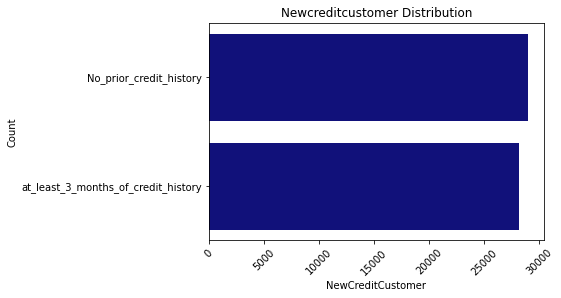

In [ ]:
print("Column Description:\n", df[cat_cols[0]].describe())
print("\nColumn Counts:\n", df[cat_cols[0]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[0])

- Loan records is almost pefecly half/half between cases of loans with no prior credit history and those have at least 3 months of credit history.

Column Description:
 count                            57135
unique                               4
top       Income_and_expenses_verified
freq                             33144
Name: VerificationType, dtype: object

Column Counts:
 Income_and_expenses_verified                   0.580100
Income_unverified                              0.402940
Income verified                                0.016942
Income_unverified_cross_referenced_by_phone    0.000018
Name: VerificationType, dtype: float64



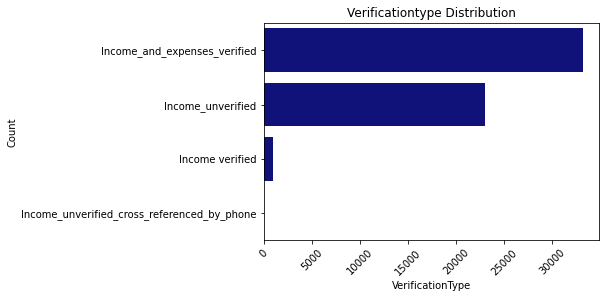

In [ ]:
print("Column Description:\n", df[cat_cols[1]].describe())
print("\nColumn Counts:\n", df[cat_cols[1]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[1])

- Although the most frequnt category is loans which has been verified for noth income and expenses, still the 2nd most frequant category are those whose Income remained unverfied.

Column Description:
 count        57135
unique           6
top       Estonian
freq         31060
Name: LanguageCode, dtype: object

Column Counts:
 Estonian     0.543625
Finnish      0.207456
Spanish      0.134699
Russian      0.107815
English      0.006371
Slovakian    0.000035
Name: LanguageCode, dtype: float64



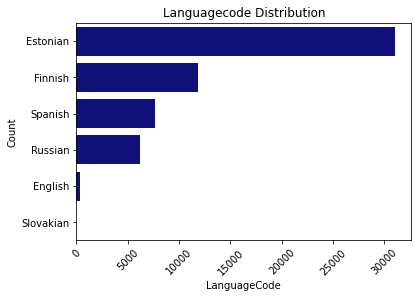

In [ ]:
print("Column Description:\n", df[cat_cols[2]].describe())
print("\nColumn Counts:\n", df[cat_cols[2]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[2])

- Estonian speaking borrowers seem to demonate the data records of current loans with 31k count, more than twice the 2nd language of borrowers which is French.
- I wonder what is the most ferquant language between other Status type borrowers.

Column Description:
 count     57135
unique        3
top        Male
freq      34953
Name: Gender, dtype: object

Column Counts:
 Male         0.611762
Woman        0.302547
Undefined    0.085692
Name: Gender, dtype: float64



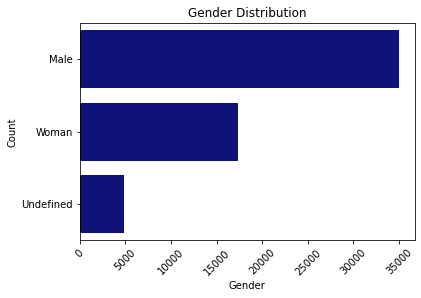

In [ ]:
print("Column Description:\n", df[cat_cols[3]].describe())
print("\nColumn Counts:\n", df[cat_cols[3]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[3])

- Male is the domenant gender in Current Loans, wonder what's the case on the other Status cols.

Column Description:
 count     57135
unique        4
top          EE
freq      37439
Name: Country, dtype: object

Column Counts:
 EE    0.655273
FI    0.209556
ES    0.135136
SK    0.000035
Name: Country, dtype: float64



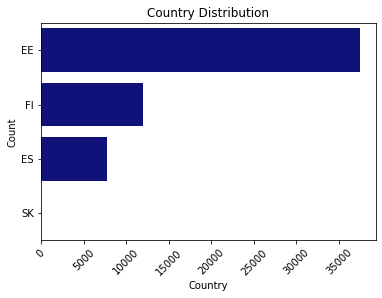

In [ ]:
print("Column Description:\n", df[cat_cols[4]].describe())
print("\nColumn Counts:\n", df[cat_cols[4]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[4])

- No wonder there, expected result giving what we observed in Language column.

In [ ]:
print("Column Description:\n", df[cat_cols[5]].describe())

Column Description:
 count             40810
unique              287
top       Harju maakond
freq              13269
Name: County, dtype: object


- Since the unique count of 'County' attribute is 287 values, we can't acctually visualize it, but from distribution features shown by '.describe()' func. we see that more than 25% of the borrowers live in 'Harju maakond' county.

In [ ]:
print("Column Description:\n", df[cat_cols[6]].describe())

Column Description:
 count       52385
unique       3325
top       Tallinn
freq         9137
Name: City, dtype: object


- Since the unique count of 'City' attribute is 3325 values, we can't acctually visualize it, but from distribution features shown by '.describe()' func. we see that the most frequant city is Tallinn.

Column Description:
 count       57135
unique         10
top       Not_set
freq        53769
Name: UseOfLoan, dtype: object

Column Counts:
 Not_set               0.941087
Home_improvement      0.019060
Other                 0.013512
Loan_consolidation    0.008664
Vehicle               0.004656
Business              0.003623
Travel                0.002905
Health                0.002660
Real_estate           0.001960
Education             0.001873
Name: UseOfLoan, dtype: float64



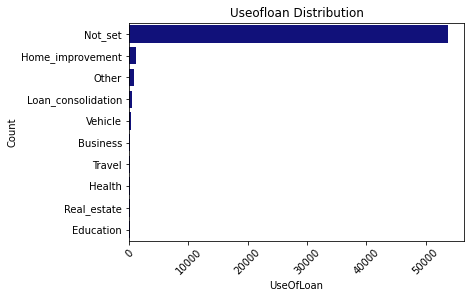

In [ ]:
print("Column Description:\n", df[cat_cols[7]].describe())
print("\nColumn Counts:\n", df[cat_cols[7]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[7])

- Most of borrowes refused of set their reason for asking for Loan from Bondora, with Not_set is the most frequant category (above 90%) of the data.

Column Description:
 count                   57135
unique                      6
top       Secondary_education
freq                    22773
Name: Education, dtype: object

Column Counts:
 Secondary_education     0.398582
Higher_education        0.253417
Vocational_education    0.210081
Primary_education       0.119559
Basic_education         0.018343
Undefined               0.000018
Name: Education, dtype: float64



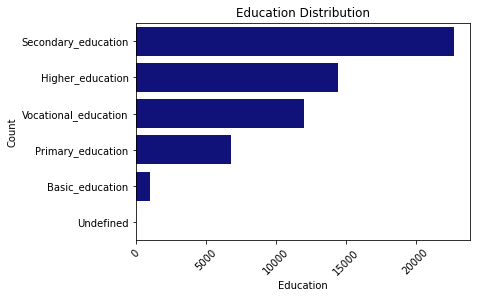

In [ ]:
print("Column Description:\n", df[cat_cols[8]].describe())
print("\nColumn Counts:\n", df[cat_cols[8]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[8])

- Almost 65% of borrowers had either secondary, or higher education, which could prove highly effective factor on the loan deing defaulted or not.
- let's check the distribution of Education for those whose Loan has been defaulted.

Higher_education        0.504132
Secondary_education     0.239669
Vocational_education    0.214876
Primary_education       0.024793
Basic_education         0.016529
Name: Education, dtype: float64



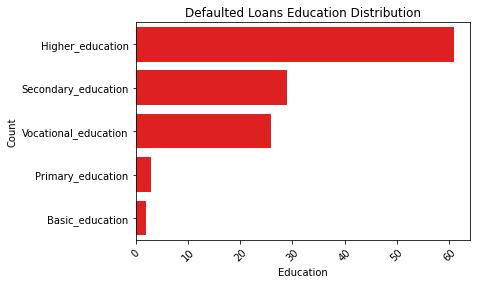

In [ ]:
col = cat_cols[8]
print(df[df['defaulted']==1][col].value_counts(normalize=True))
print()
sns.barplot(data=df[df['defaulted']==1], x = df[df['defaulted']==1][col].dropna().value_counts().values,
            y=df[df['defaulted']==1][col].dropna().value_counts().index, color='red') #palette='mako'
plt.title("Defaulted Loans " + str.title(col)+" Distribution")
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The same distribution appears after filtering the defaulted loans only in the data, where 75% of defaulted loan borrowers had secondary or higher education, which invalid our previous assumption about the effect of education on the target value.
- This poses another hypothesis, that the case could be that people with higher and secondary educations tend to ask for Loans than other people, this assumption is worth testing but it's not related to our analysis.

Column Description:
 count             57135
unique                6
top       Not_specified
freq              53769
Name: MaritalStatus, dtype: object

Column Counts:
 Not_specified    0.941087
Married          0.020425
Cohabitant       0.016120
Single           0.015682
Divorced         0.005251
Widow            0.001435
Name: MaritalStatus, dtype: float64



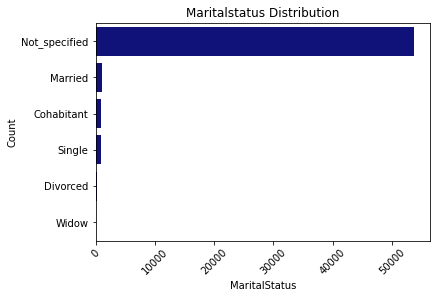

In [ ]:
print("Column Description:\n", df[cat_cols[9]].describe())
print("\nColumn Counts:\n", df[cat_cols[9]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[9])
#i+=1

- Almost 95% of borrowers didn't specify their Marital status, which makes this attribute not effective in our analysis.

Column Description:
 count             57135
unique                6
top       Not_specified
freq              53769
Name: EmploymentStatus, dtype: object

Column Counts:
 Not_specified         0.941087
Fully_employed        0.048149
Entrepreneur          0.005461
Retiree               0.002398
Self-employed         0.001610
Partially_employed    0.001295
Name: EmploymentStatus, dtype: float64



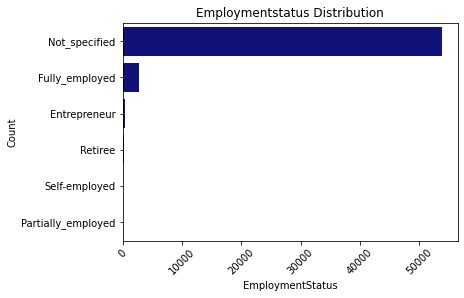

In [ ]:
print("Column Description:\n", df[cat_cols[10]].describe())
print("\nColumn Counts:\n", df[cat_cols[10]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[10])

- Almost 95% of borrowers didn't specify their Employment status, which makes this attribute not effective in our analysis.

Column Description:
 count              57133
unique                 9
top       MoreThan5Years
freq               22761
Name: EmploymentDurationCurrentEmployer, dtype: object

Column Counts:
 MoreThan5Years    0.398386
UpTo5Years        0.256139
UpTo1Year         0.173262
Retiree           0.073653
Other             0.052877
UpTo2Years        0.016750
UpTo3Years        0.015683
UpTo4Years        0.010974
TrialPeriod       0.002275
Name: EmploymentDurationCurrentEmployer, dtype: float64



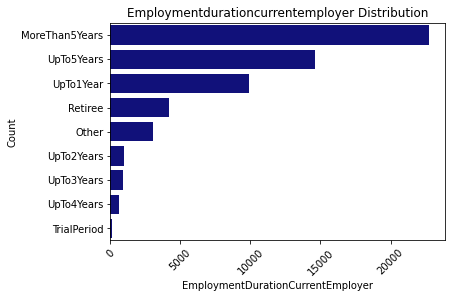

In [ ]:
print("Column Description:\n", df[cat_cols[11]].describe())
print("\nColumn Counts:\n", df[cat_cols[11]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[11])
#i+=1

- Almost 65% of borrowers are employed for either 'MoreThan5Years' or 'UpTo5Years', which raises the question,
- Is stability at workplace leads to a more reliable borrwer? to check this llet's see the distribution in defaulted loans.

MoreThan5Years    0.425000
UpTo5Years        0.241667
UpTo2Years        0.083333
UpTo1Year         0.075000
Retiree           0.066667
UpTo3Years        0.058333
UpTo4Years        0.050000
Name: EmploymentDurationCurrentEmployer, dtype: float64



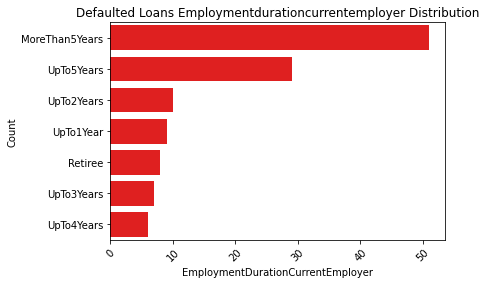

In [ ]:
col = cat_cols[11]
print(df[df['defaulted']==1][col].value_counts(normalize=True))
print()
sns.barplot(data=df[df['defaulted']==1], x = df[df['defaulted']==1][col].dropna().value_counts().values,
            y=df[df['defaulted']==1][col].dropna().value_counts().index, color='red') #palette='mako'
plt.title("Defaulted Loans " + str.title(col)+" Distribution")
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Again, False alarm it has the same distribution even after filtering defaulted loans 65% are MoreThan5Years or UpTo5Years emplyed at thier last employer, which again raises 2 matter,
1. Hypothesis: Higher stability in work place makes people more open to ask for loans.
2. Question: What is the distribution among the other 2 categories of original 'Status' attribute of the loan.

Which are not relative to our analysis.

Column Description:
 count             57135
unique               20
top       Not_specified
freq              53769
Name: OccupationArea, dtype: object

Column Counts:
 Not_specified                   0.941087
Other                           0.013669
Retail_wholesale                0.006651
Processing                      0.005636
Construction                    0.005338
Healthcare_social_help          0.004166
Transport_warehousing           0.003255
Education                       0.003133
Hospitality_catering            0.002730
Info_telecom                    0.002643
Civil_service&military          0.002258
Agriculture_forestry_fishing    0.001873
Art_entertainment               0.001663
Finance_insurance               0.001645
Research                        0.001243
Energy                          0.000998
Administrative                  0.000788
Real-estate                     0.000770
Utilities                       0.000350
Mining                          0.000105
Name: Occu

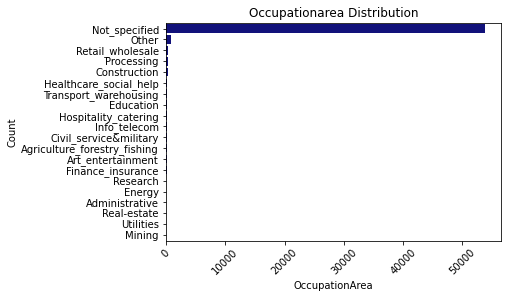

In [ ]:
print("Column Description:\n", df[cat_cols[12]].describe())
print("\nColumn Counts:\n", df[cat_cols[12]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[12])

-About 75% of borrowes haven't specified their Occupation Area, which renders this columns inrelevant to our target value.

Column Description:
 count     57135
unique       11
top       Owner
freq      22740
Name: HomeOwnershipType, dtype: object

Column Counts:
 Owner                            0.398005
Tenant_pre-furnished_property    0.222928
Living_with_parents              0.140089
Mortgage                         0.117179
Other                            0.083609
Joint ownership                  0.011132
Council_house                    0.009801
Tenant_unfurnished_property      0.009644
Joint tenant                     0.004481
Owner_with_encumbrance           0.003115
Not_specified                    0.000018
Name: HomeOwnershipType, dtype: float64



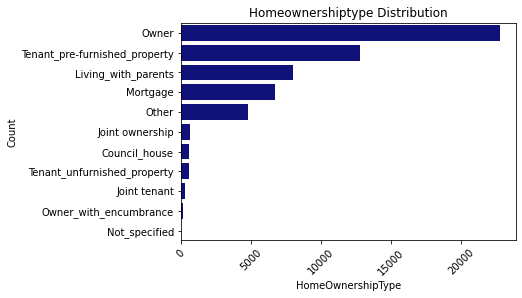

In [ ]:
print("Column Description:\n", df[cat_cols[13]].describe())
print("\nColumn Counts:\n", df[cat_cols[13]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[13])

- About 62% of borrowers either Owners of their household, or live in a furnished property, which raises a question about a possible relation between income of a borrower and his attitude regaring asking for loans and timely paying them.

Column Description:
 count     57133
unique        8
top           E
freq      12173
Name: Rating, dtype: object

Column Counts:
 E     0.213064
D     0.171285
C     0.164966
F     0.148846
B     0.134948
AA    0.078379
A     0.071517
HR    0.016995
Name: Rating, dtype: float64



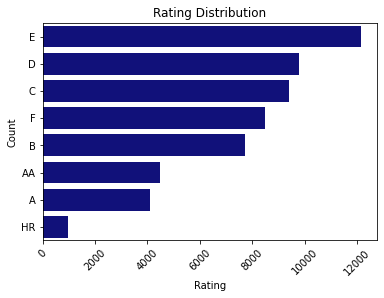

In [ ]:
print("Column Description:\n", df[cat_cols[14]].describe())
print("\nColumn Counts:\n", df[cat_cols[14]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[14])

- Rating from Bondora's Rating models seems to be uniformally distributed across ratings (D, C, F, B), while E has the higest count, both (AA, A) are almost equally distributed.

Column Description:
 count            57135
unique               2
top       Unstructured
freq             45015
Name: Restructured, dtype: object

Column Counts:
 Unstructured    0.787871
Structured      0.212129
Name: Restructured, dtype: float64



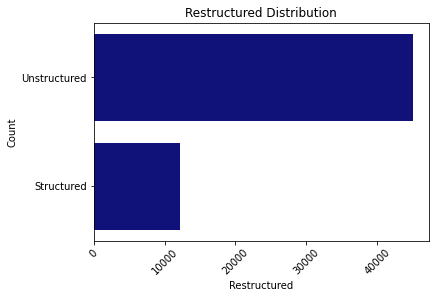

In [ ]:
print("Column Description:\n", df[cat_cols[15]].describe())
print("\nColumn Counts:\n", df[cat_cols[15]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[15])

- Most of the Current loans's maturity dates hasn't been increased by more than 60 days, which could prove a highly effective factor of the loan being defaulted, 
- Let's check that out...

Structured      103
Unstructured     18
Name: Restructured, dtype: int64



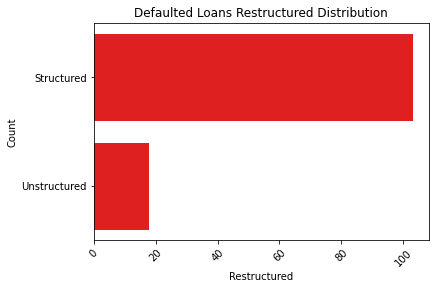

In [ ]:
col = cat_cols[15]
print(df[df['defaulted']==1][col].value_counts())
print()
sns.barplot(data=df[df['defaulted']==1], x = df[df['defaulted']==1][col].dropna().value_counts().values,
            y=df[df['defaulted']==1][col].dropna().value_counts().index, color='red') #palette='mako'
plt.title("Defaulted Loans " + str.title(col)+" Distribution")
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Same distribution, no appearent effect.

Column Description:
 count     53747
unique        8
top           M
freq      53222
Name: CreditScoreEsMicroL, dtype: object

Column Counts:
 M      0.990232
M1     0.003740
M2     0.001972
M3     0.001823
M4     0.001116
M5     0.001023
M6     0.000074
M10    0.000019
Name: CreditScoreEsMicroL, dtype: float64



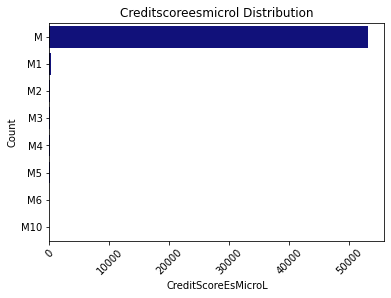

In [ ]:
print("Column Description:\n", df[cat_cols[16]].describe())
print("\nColumn Counts:\n", df[cat_cols[16]].value_counts(normalize=True))
print("")
plot_uni_cat(cat_cols[16])

- Almost 99% of the loans doen't have Credit scores Microl, since 'M' category indicates unspecified, which renders this attribute un relevant to our analysis.

**Conclusion:**
- After unvariant analysis of categorical attributes, we reached that some aren't relevant to our target analysis due to (Lack of identifiable information | Exssesive number of unique values)
- Action --> drop these attributes from the dataset.

In [ ]:
del_cols = ['UseOfLoan', 'MaritalStatus', 'EmploymentStatus','OccupationArea', 'CreditScoreEsMicroL', 'County', 'City']
df.drop(del_cols, axis=1, inplace=True)

In [ ]:
df.shape

(57135, 35)

## Numerical Features Analysis:

- Checking distributions of every numerical attribute and its relation to 'defaulted' column. 

In [ ]:
for col in del_cols:
  cat_cols.remove(col)

(len(num_cols) + len(cat_cols)) == df.shape[1]

True

In [ ]:
print(len(num_cols))

25


In [ ]:
def plot_uni_num(col):
  '''
  Plotting Univariant visualization of Numerical features
  '''
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  if df[col].isnull().sum() == 0:
    sns.boxplot(df[col], ax=ax[0], showfliers=False, color="lightblue")
    sns.distplot(df[col], ax=ax[1], kde=False, bins=40)
  else:
    sns.boxplot(df[col].dropna(), ax=ax[0], showfliers=False, color="lightblue")
    sns.distplot(df[col].dropna(), ax=ax[1], kde=False, bins=40)
  plt.title(f'{col} Distribution')

Column Distribution: 
 count    57135.000000
mean       620.964995
std        971.618839
min          0.000000
25%        106.000000
50%        277.000000
75%        682.000000
max      10625.000000
Name: BidsPortfolioManager, dtype: float64



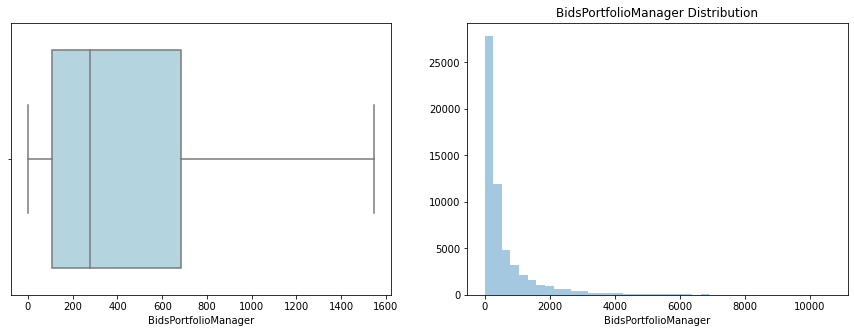

In [ ]:
print('Column Distribution: \n', df[num_cols[0]].describe())
print()
plot_uni_num(num_cols[0])

- the amount of investment offers made by portfolio managers is right skewed, Protfolio managers like to play it safe with low amount of offrs.
- There're outliers above 1.6k, which is evident on the boxplot.
- Most of the data between (100 --> 700).

Column Distribution: 
 count    57135.000000
mean        24.160882
std        129.660918
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       5565.000000
Name: BidsApi, dtype: float64



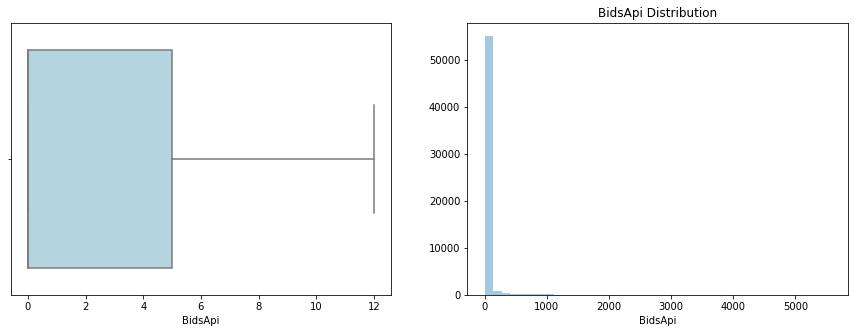

In [ ]:
print('Column Distribution: \n', df[num_cols[1]].describe())
print()
plot_uni_num(num_cols[1])

- Also right skewed with a similar nature to BidsProtfolioManager.
- There's an outlier makes the data severly skewed right, which is evident on the bix plot.
- Most of the data is in the range (0-->4).
- Let's check both value_counts and hist for range of (0, 12).

Colum Count: 
 0      35211
5       2896
1       2496
10      1883
2       1691
       ...  
246        1
462        1
950        1
456        1
317        1
Name: BidsApi, Length: 772, dtype: int64



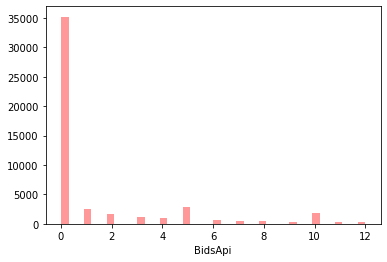

In [ ]:
print("Colum Count: \n", df[num_cols[1]].value_counts())
print()
sns.distplot(df[df[num_cols[1]] <= 12][num_cols[1]], kde=False, bins=40, color='red')

- Looks like the outliers is just a special case in data, as they evident along various values, and different loans.

Column Distribution: 
 count    57135.000000
mean       554.321362
std        641.063762
min          0.000000
25%        163.500000
50%        349.000000
75%        712.000000
max      10630.000000
Name: BidsManual, dtype: float64



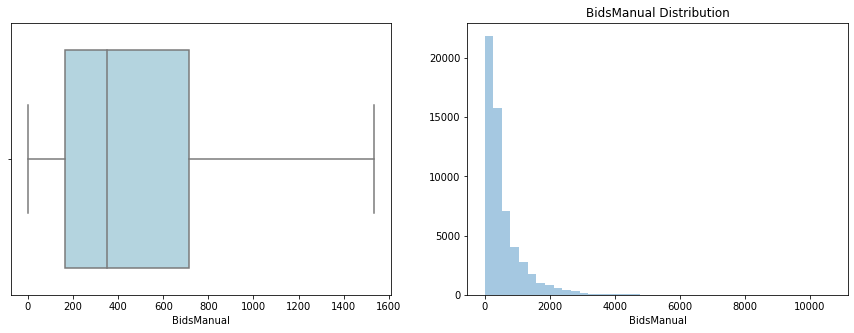

In [ ]:
print('Column Distribution: \n', df[num_cols[2]].describe())
print()
plot_uni_num(num_cols[2])

- Again similar properties of previous Bids attributes.
- Most of the data falls between 200 --> 700.

Column Distribution: 
 count    57135.000000
mean        42.455203
std         12.375511
min         18.000000
25%         33.000000
50%         42.000000
75%         52.000000
max         70.000000
Name: Age, dtype: float64



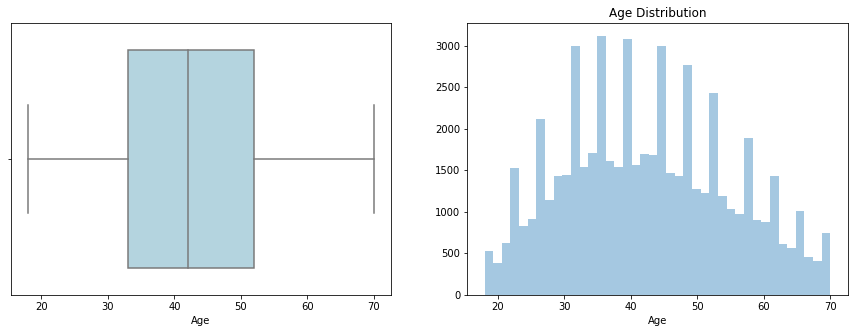

In [ ]:
print('Column Distribution: \n', df[num_cols[3]].describe())
print()
plot_uni_num(num_cols[3])

- As expected, age is normally distributed.
- That's why Age is better indicative of the data when it's categorical, as age group.
- Let's fix that.

In [ ]:
df['Age'].unique()

array([28, 27, 29, 25, 30, 39, 47, 68, 53, 55, 32, 43, 52, 69, 56, 40, 51,
       67, 35, 37, 22, 41, 46, 48, 49, 62, 38, 63, 60, 44, 50, 45, 54, 31,
       61, 26, 57, 24, 36, 65, 66, 42, 64, 34, 58, 23, 33, 59, 21, 70, 20,
       19, 18])

In [ ]:
def code(x):
  if x < 30:
    return "20's"
  elif x < 40:
    return "30's"
  elif x < 50:
    return "40's"
  elif x < 60:
    return "50's"
  else:
    return "above 50's"

# apply codeing function
df['AgeGroup'] = df['Age'].map(lambda x: code(x)) 

Column Description:
 count     57135
unique        5
top        30's
freq      15480
Name: AgeGroup, dtype: object

Column Counts:
 30's          0.270937
40's          0.265652
50's          0.190846
20's          0.165993
above 50's    0.106572
Name: AgeGroup, dtype: float64



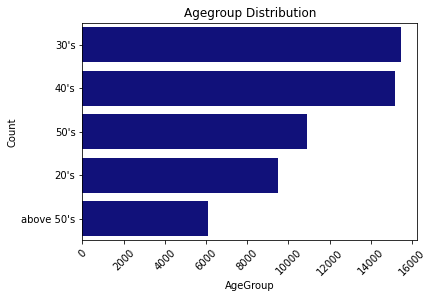

In [ ]:
print("Column Description:\n", df['AgeGroup'].describe())
print("\nColumn Counts:\n", df['AgeGroup'].value_counts(normalize=True))
print("")
plot_uni_cat('AgeGroup')

- That defenitly makes more sense, as we see clearly that almost 55% of borrowers are in their 30's or 40's, and the min age category of borrowers are those who're above 50 yrs old.

Column Distribution: 
 count    57135.000000
mean      2702.164943
std       2247.963237
min        500.000000
25%        850.000000
50%       2125.000000
75%       4150.000000
max      10632.000000
Name: AppliedAmount, dtype: float64



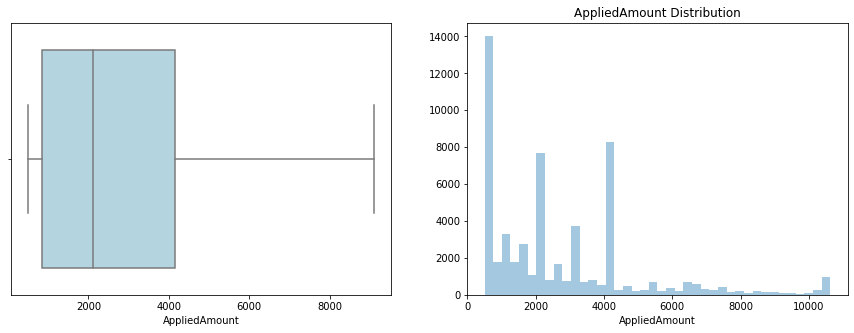

In [ ]:
print('Column Distribution: \n', df[num_cols[4]].describe())
print()
plot_uni_num(num_cols[4])

- The attribute is right skewed, and there's no outliers detected
- There're 3 peakes of the distribution.

Column Distribution: 
 count    57135.000000
mean      2640.316899
std       2175.097309
min        260.000000
25%        850.000000
50%       2125.000000
75%       4150.000000
max      10632.000000
Name: Amount, dtype: float64



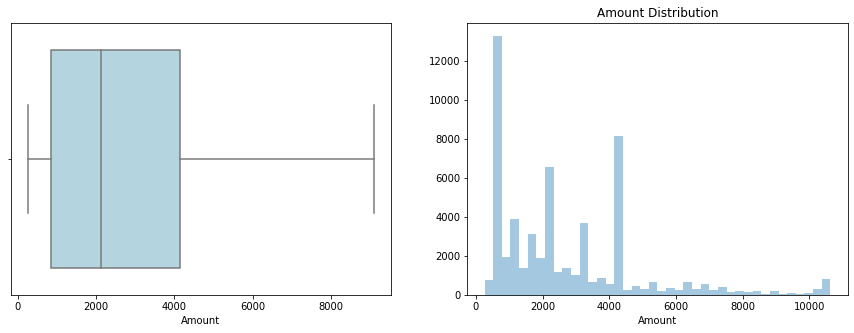

In [ ]:
print('Column Distribution: \n', df[num_cols[5]].describe())
print()
plot_uni_num(num_cols[5])

- Interesting, again similar distribution to the prior Amount related attributes.
- Right skewed, with no outliers, and there're 3 peakes of the distribution.

Column Distribution: 
 count    57135.000000
mean        29.913080
std         17.184065
min          7.270000
25%         16.100000
50%         27.070000
75%         37.500000
max        240.560000
Name: Interest, dtype: float64



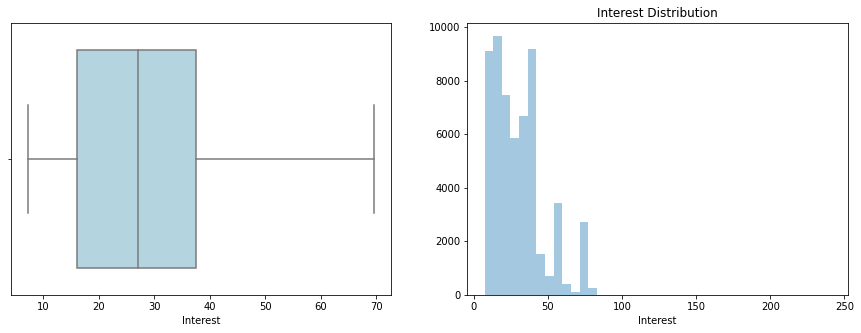

In [ ]:
print('Column Distribution: \n', df[num_cols[6]].describe())
print()
plot_uni_num(num_cols[6])

- Interset Rates are right skewed and almost limited between 15% and 40%, which make sense.
- As Interest lower than 15% is not very profitable for an investor, and above 40% is very costly for a borrower.
- There's Interset rates above 100% percent, which dosen't make any sense at all, needs further investigation.

Column Distribution: 
 count    57135.000000
mean        48.489682
std         13.031395
min          3.000000
25%         36.000000
50%         60.000000
75%         60.000000
max         60.000000
Name: LoanDuration, dtype: float64



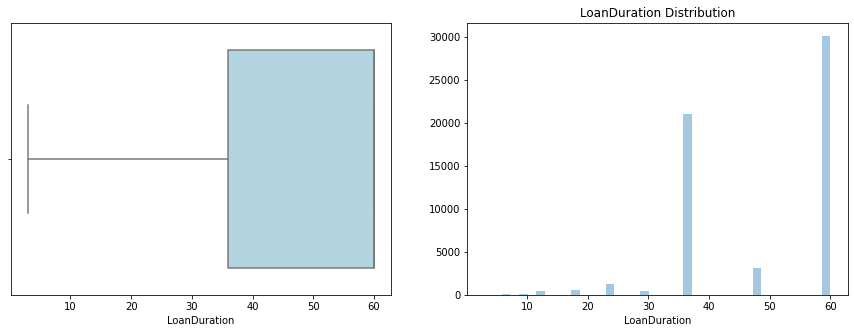

In [ ]:
print('Column Distribution: \n', df[num_cols[7]].describe())
print()
plot_uni_num(num_cols[7])

- Loan durations is almost Limited to 60, 36, 48 months with 60 months being the dominant variables.
- Also this attributes makes sense more as categorical variable, let's see its value_counts.

In [ ]:
df[num_cols[7]].value_counts()

60    30074
36    20973
48     3124
24     1226
18      519
12      485
30      485
9       142
6       101
3         6
Name: LoanDuration, dtype: int64

- As expected it makes sense more as categorical variable, but to avoid having more columns while training our model, just leave it numerical.

Column Distribution: 
 count    57077.000000
mean       105.060883
std         87.742412
min          0.000000
25%         31.140000
50%         90.730000
75%        143.900000
max       1284.220000
Name: MonthlyPayment, dtype: float64



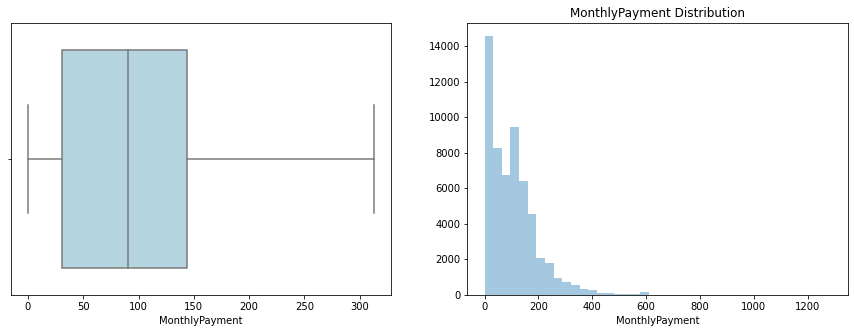

In [ ]:
print('Column Distribution: \n', df[num_cols[8]].describe())
print()
plot_uni_num(num_cols[8])

- MonthlyPayment is right skewed.
- Most borrowers pay monthly amount ranges between 25 and 150.

Column Distribution: 
 count     57135.000000
mean       1527.973334
std        2477.264378
min           0.000000
25%         840.000000
50%        1200.000000
75%        1800.000000
max      235800.000000
Name: IncomeTotal, dtype: float64



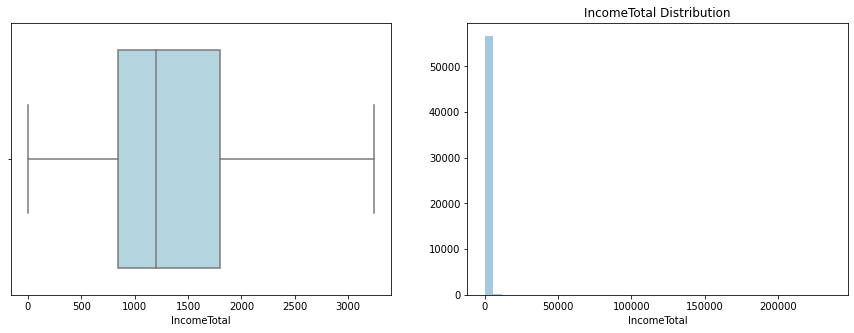

In [ ]:
col = num_cols[9]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Wow, an outlier of almost 240k has dramatically skewed the distribution right, which appears in the boxplot the wiskers upper limit is at 3k.
- Most of the data falls between Income of 800 to 3k.
- Lets check the histogram in a data range of (0,3000). 

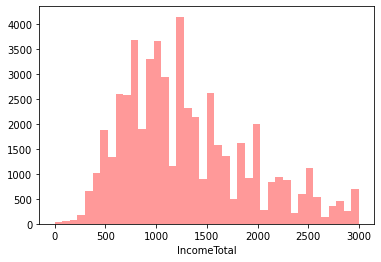

In [ ]:
sns.distplot(df[df[col] <= 3000][col], kde=False, bins=40, color='red')

- As expected from the boxplot, Icome is normally distributed without the outlier, which makes us believe that this outlier is an error of the data.
- Let's keep a note, and check with the data owner. 

Column Distribution: 
 count    57135.000000
mean         2.952849
std          3.313259
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         40.000000
Name: ExistingLiabilities, dtype: float64



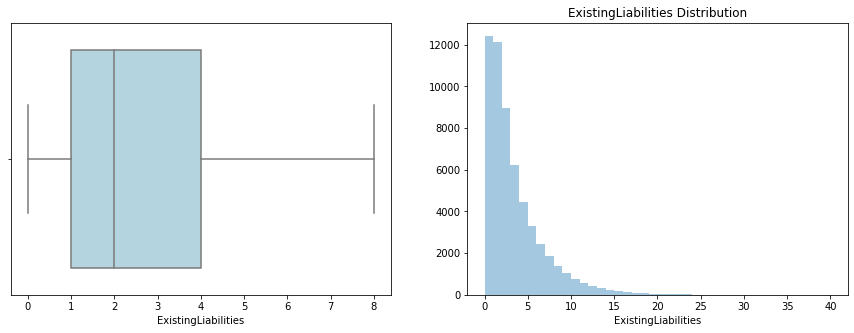

In [ ]:
col = num_cols[10]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Most borrowers have existent liabilities between 1 and 4, which results in a right skewed distribution.
- I suspect there's an outlier in this attribute, let's check value_counts.

In [ ]:
df[col].value_counts()

0     12418
1     12141
2      8971
3      6238
4      4438
5      3302
6      2415
7      1841
8      1382
9      1045
10      740
11      573
12      428
13      308
14      246
15      166
16      137
17       94
18       69
19       50
20       40
21       22
22       18
23       17
26        7
24        7
25        5
27        4
31        3
28        2
32        2
39        2
33        1
40        1
29        1
30        1
Name: ExistingLiabilities, dtype: int64

- As we see, we could say that the data's normaly distributed range is between 0 and 10 liabilities, and there're an obvious outliers in this attribute.
- But this is an anomnly in the data, I don't suspect it to be errors.
- Which raises the question, Why are these Loans approved despite their borrowes having so much liabilities, Is the total amount of liabilities is a higher effective factor, than the number.

Column Distribution: 
 count     57135.000000
mean        354.913541
std        1226.279040
min           0.000000
25%          37.000000
50%         235.000000
75%         485.575000
max      250100.000000
Name: LiabilitiesTotal, dtype: float64



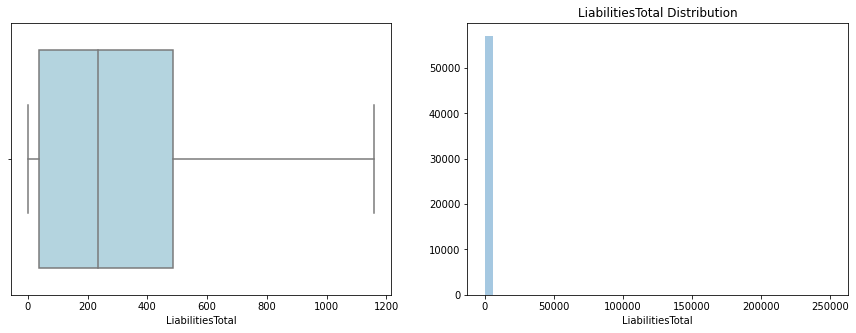

In [ ]:
col = num_cols[11]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- An outlier of 250k is dramatically skeweing the data right, Let's check the distribution without in a data range of (1, 1200).

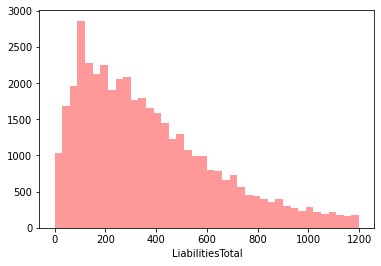

In [ ]:
sns.distplot(df[(df[col] <= 1200) & (df[col] > 0)][col], kde=False, bins=40, color='red')

- In range (1,1200), The data is almost normaly distributed, slighlt skewed right.
- Since not having liabilites while applying for aloan make sense, Then that hight amount of exsiting liabilities is defenilty an error in the data.
- which raises the question, What is the number of liabilities to this high liability amount, Let's see that...

In [ ]:
df[df[col] > 10000]['ExistingLiabilities'].value_counts()

3     4
1     3
2     3
7     2
14    1
4     1
8     1
Name: ExistingLiabilities, dtype: int64

- Large total liability amount didn't necessary mean high number of existing liabilities.

Column Distribution: 
 count    57135.000000
mean         0.034497
std          0.377524
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: RefinanceLiabilities, dtype: float64



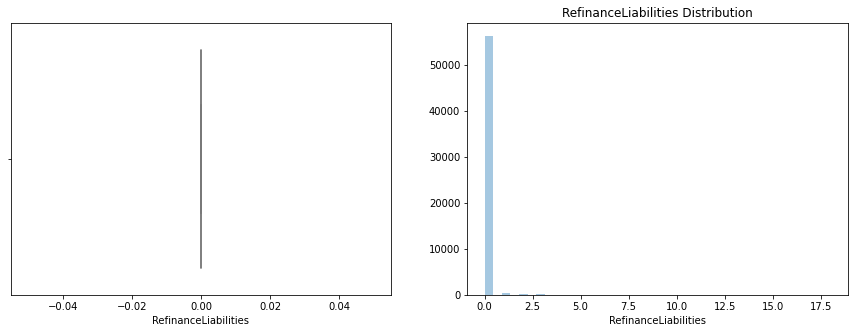

In [ ]:
col = num_cols[12]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

In [ ]:
df['RefinanceLiabilities'].value_counts()

0     56351
1       308
2       191
3       127
4        61
5        34
6        26
7        17
8         6
9         5
10        2
11        2
13        1
15        1
18        1
16        1
14        1
Name: RefinanceLiabilities, dtype: int64

- More than 75% of current borrower, has no prior refinancied liabilities.
- Let's see the distribution of this attribute in range (1, max)

Column Distribution: 
 count    784.000000
mean       2.514031
std        2.039159
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: RefinanceLiabilities, dtype: float64



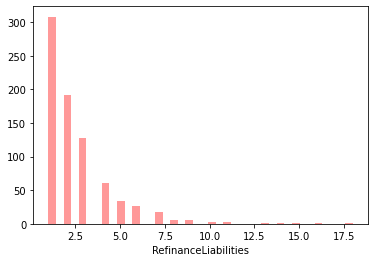

In [ ]:
col = num_cols[12]
print('Column Distribution: \n', df[df[col] > 0][col].describe())
print()
sns.distplot(df[df[col] > 0][col], kde=False, bins=40, color='red')

- The data is right skewed.

- Attributes ['DebtToIncome', 'FreeCash', 'InterestAndPenaltyBalance', 'PreviousEarlyRepaymentsCountBeforeLoan'] attributes follow the same distribution with the same anomly since they depend in their calculation abon liabilities attributes.

- This consistent outliers in all liabilities related attribute, could be written is a different currency than the rest of the amounts in these attributes, must check that with Data Owner. 

Column Distribution: 
 count    57135.000000
mean        10.854187
std          6.617111
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         27.000000
Name: MonthlyPaymentDay, dtype: float64



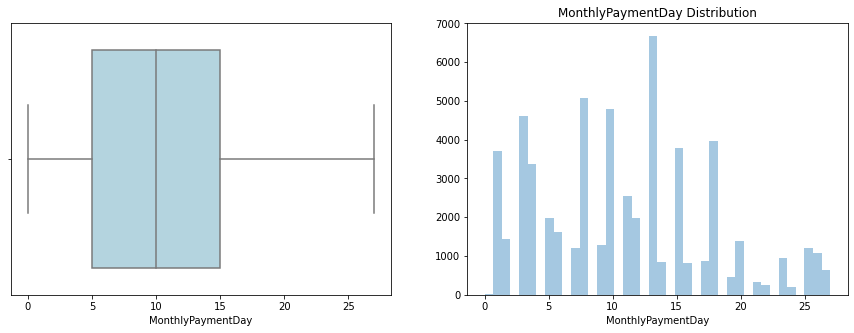

In [ ]:
col = num_cols[15]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Almost uniformally distributed attribute, with no special insight to mention.

Column Distribution: 
 count    57135.000000
mean       333.241858
std        654.100096
min          0.000000
25%         43.650000
50%        127.910000
75%        323.590000
max      10368.630000
Name: PrincipalPaymentsMade, dtype: float64



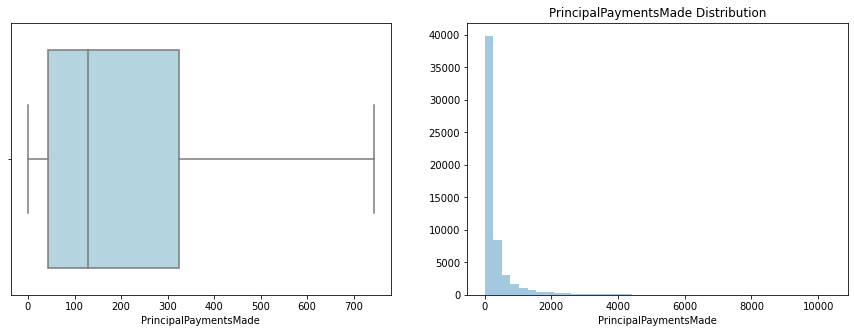

In [ ]:
col = num_cols[16]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- data is right skewed due to the existance of outliers, which is evident in the boxplot.

Column Distribution: 
 count    57135.000000
mean       468.927808
std        825.562760
min          0.000000
25%         52.490000
50%        171.340000
75%        514.950000
max      16873.000000
Name: InterestAndPenaltyPaymentsMade, dtype: float64



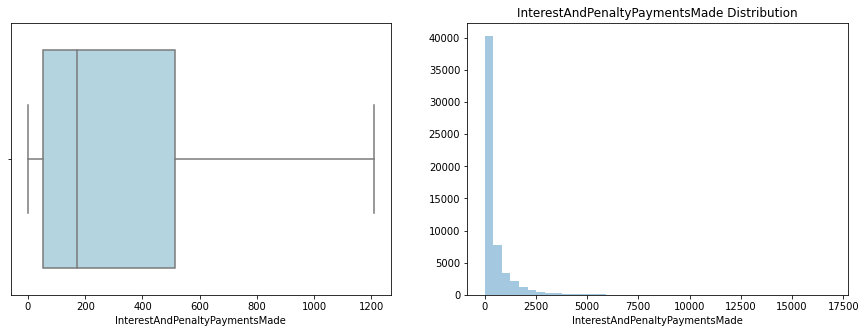

In [ ]:
col = num_cols[17]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- follows a smiliar distribution and characteristics as PrinciplePaymentMade, since they're dependent in nature.

Column Distribution: 
 count    57135.000000
mean      2307.074530
std       2021.099842
min          0.000000
25%        602.450000
50%       1902.080000
75%       3538.085000
max      10632.000000
Name: PrincipalBalance, dtype: float64



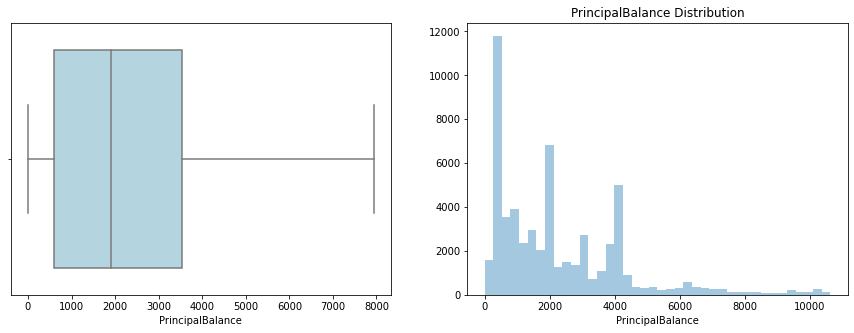

In [ ]:
col = num_cols[18]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Principle Balance of more than 75% of current loans dosen't exceed 4k, which make sense considering amount of loans distribution.

Column Distribution: 
 count    57135.000000
mean         1.957417
std          2.750272
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         25.000000
Name: NoOfPreviousLoansBeforeLoan, dtype: float64



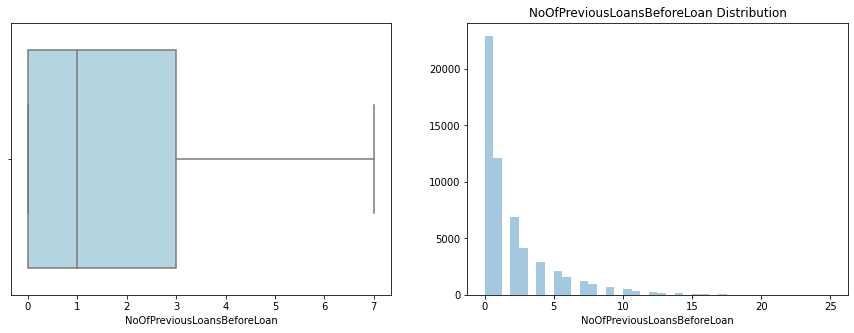

In [ ]:
col = num_cols[20]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Right skewed attribute, with IQR range between 0 and 3, which indicates, most borrowers have #Previous loans between 0 and 3, mostly 0 prior loans.

Column Distribution: 
 count    57135.000000
mean      3811.408472
std       5078.599057
min          0.000000
25%          0.000000
50%       2000.000000
75%       5845.000000
max      53762.000000
Name: AmountOfPreviousLoansBeforeLoan, dtype: float64



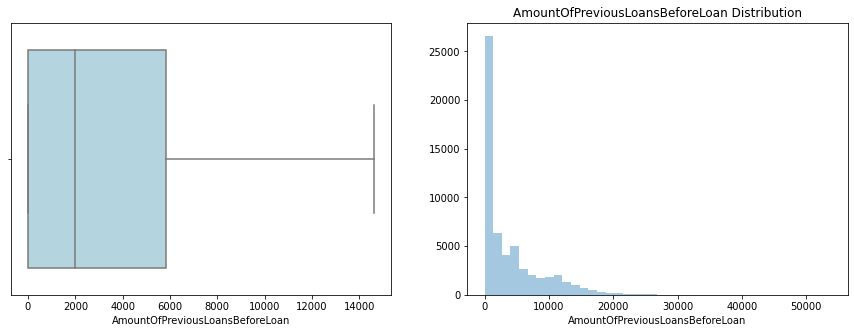

In [ ]:
col = num_cols[21]
print('Column Distribution: \n', df[col].describe())
print()
plot_uni_num(col)

- Follows similar distribution of #Previous Loans, with outliers, as 75% of data is lower than 6k.
- Again could be a data currency error, Chack on it.
- Note that ['PreviousRepaymentsBeforeLoan', ] attributes will follow the same distribution and characteristics as they're dependent on each other.

**Conclusion**:
- There're data attributes has outliers skewing the data needs to be delt with.
- Those columns are ['Interest', 'Income', 'ExistingLiabilities', 'LiabilitiesTotal', 'PrinciplePaymentMode', 'InterestAndPenltyPaymentMode', 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'DebtToIncome', 'FreeCash', 'InterestAndPenaltyBalance', 'PreviousEarlyRepaymentsCountBeforeLoan']

- All could indicate special loan case(s) in the data, needs furthur investigation, and a proper handling method.

In [ ]:
# Identifying columns with outliers
outliers_cols = ['Interest', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
                 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'DebtToIncome', 'FreeCash', 'InterestAndPenaltyBalance', 
                 'PreviousEarlyRepaymentsCountBeforeLoan', 'RefinanceLiabilities', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
                 'MonthlyPayment']

<Figure size 1080x1080 with 0 Axes>

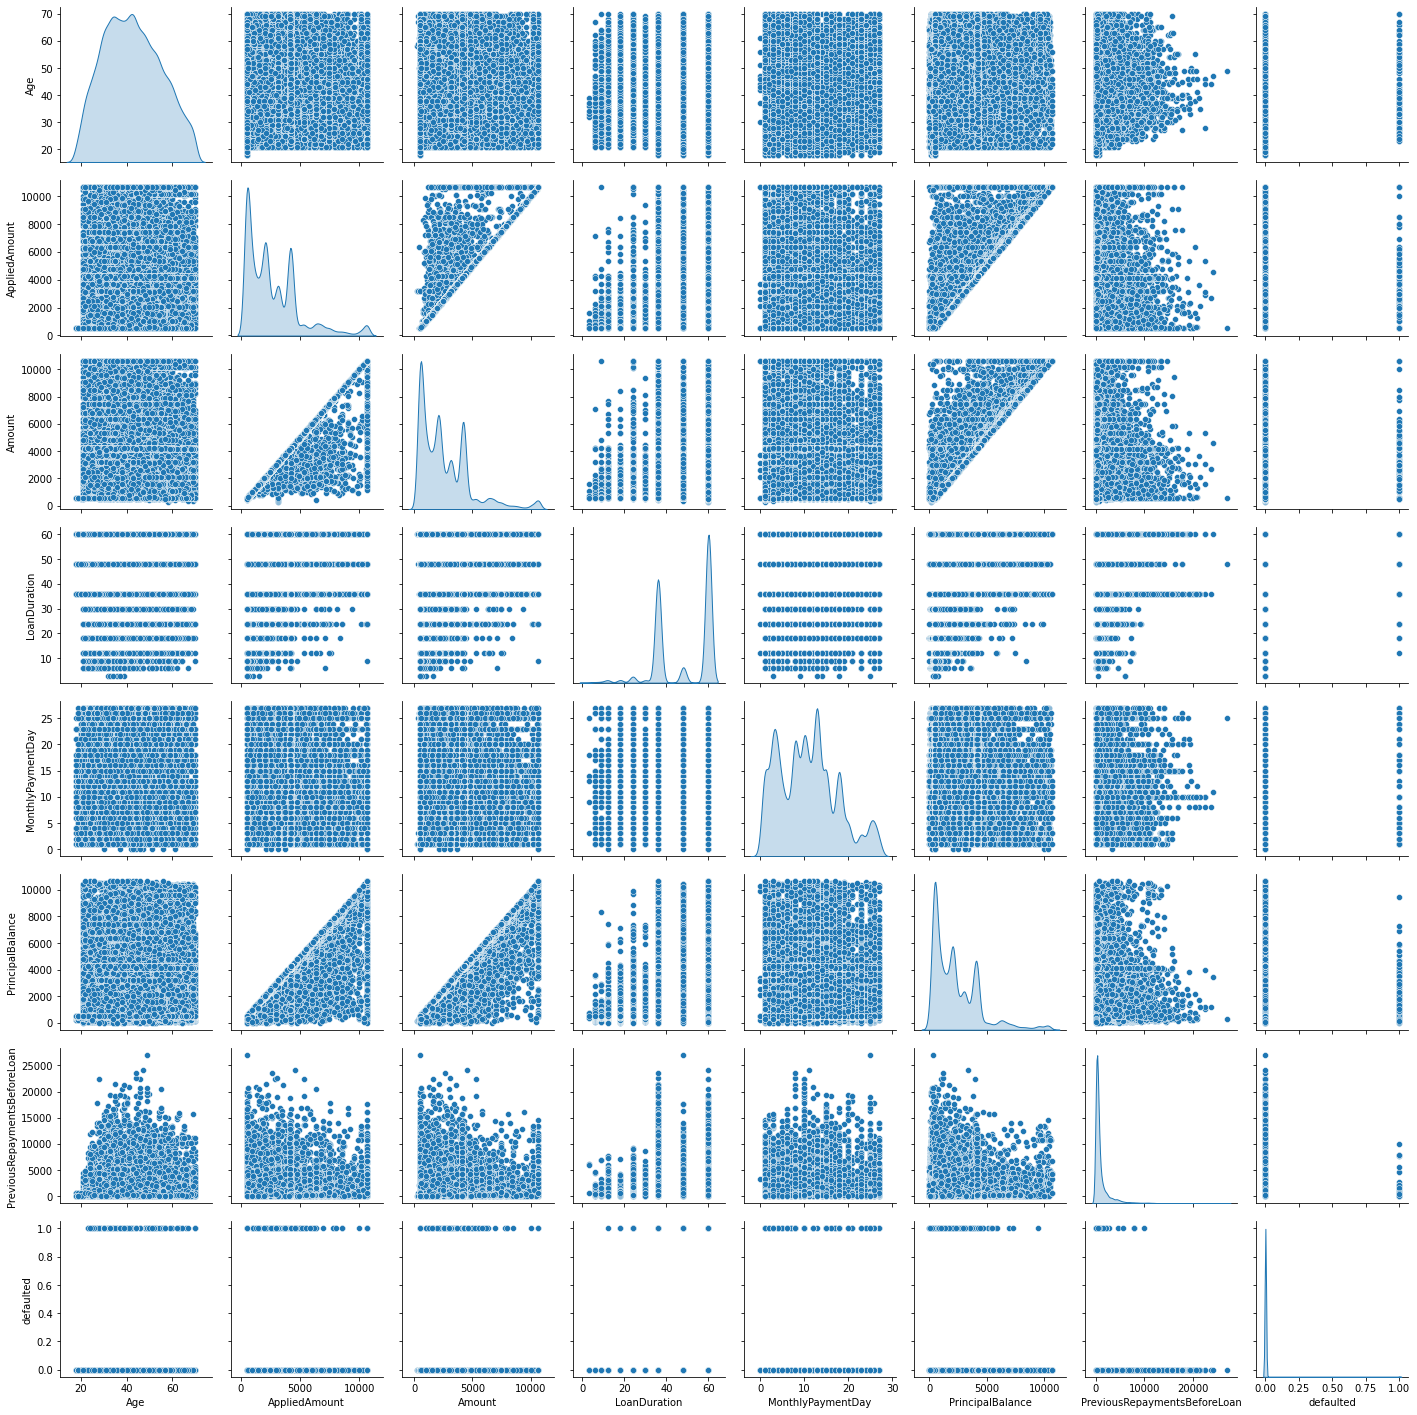

In [ ]:
# Let's view a sctter plot matrix of all numerical features.
plt.figure(figsize=(15,15))

for col in outliers_cols:
  num_cols.remove(col)
sns.pairplot(df[num_cols], diag_kind='kde')

In [ ]:
df.reset_index(inplace=True)

df.to_csv("/content/drive/MyDrive/Data_Analyst_Intern_Technocolabs/Bondora_EDA.csv", index=False)

# Feature Engineering:

**Steps:**

1. Missing Data.
2. Encoding.
3. Base Scoring & Mutual Information
4. Handling Outliers.
5. Creating Features.
6. Correlations.
7. Feature Selection.

**-I need to account for the minority difference, and Change Encoding into OneHotEncoding and reCheck the data,**

**- this way is not accounting for 1s at all**

In [ ]:
# Defining X and y
X = df.drop('defaulted', axis=1).copy()
y = df['defaulted']

X.drop(['index'], axis=1, inplace=True)

# Redefine cat_cols and num_cols to reflect the last changes made in the data preprocessing stage
cat_cols = X.select_dtypes(['O']).columns.tolist()
num_cols = X.select_dtypes([int, float]).columns.tolist()

## **1. Handing Missing Data:** 

In [ ]:
missing_cols = [col for col in X.columns.tolist() if X[col].isnull().any()]

# Count of columns with missing values
print(len(missing_cols))

4


In [ ]:
# checking that there's no additional features with missing values
X[missing_cols].isnull().sum().sum() == X.isnull().sum().sum()

True

In [ ]:
missing_cols

['MonthlyPayment',
 'EmploymentDurationCurrentEmployer',
 'Rating',
 'PreviousRepaymentsBeforeLoan']

In [ ]:
# Filling missing data in numerical features with median
for col in X[missing_cols].select_dtypes([int, float]).columns.tolist():
  value = X[col].quantile(0.5)
  X[col].fillna(value, inplace=True)

for col in X[missing_cols].select_dtypes(['O']).columns.tolist():
  value = X[col].mode()[0]
  X[col].fillna(value, inplace=True)

# Check Results
print(X[missing_cols].isnull().sum().sum())

0


## **2. Encoding:**

In [ ]:
# Check categorical features count
X.select_dtypes(['O']).columns.tolist() == cat_cols

True

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
  X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
# Check technique succes
print(len(cat_cols))
print(len(X.select_dtypes(['O']).columns.tolist()))

11
0


## **3. Base Scoring & Mutual Information**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 30, stratify=y)

clf = LogisticRegression(random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f" Model Scoring: {clf.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9974621510457687
 Confusion Matrix:
 [[11398    24]
 [    5     0]]


In [ ]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

InterestAndPenaltyBalance         0.007549
HomeOwnershipType                 0.004543
Restructured                      0.002810
PrincipalPaymentsMade             0.002094
Interest                          0.001781
NoOfPreviousLoansBeforeLoan       0.001451
InterestAndPenaltyPaymentsMade    0.000771
LiabilitiesTotal                  0.000355
MonthlyPayment                    0.000192
FreeCash                          0.000000
Country                           0.000000
LanguageCode                      0.000000
Name: MI Scores, dtype: float64

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

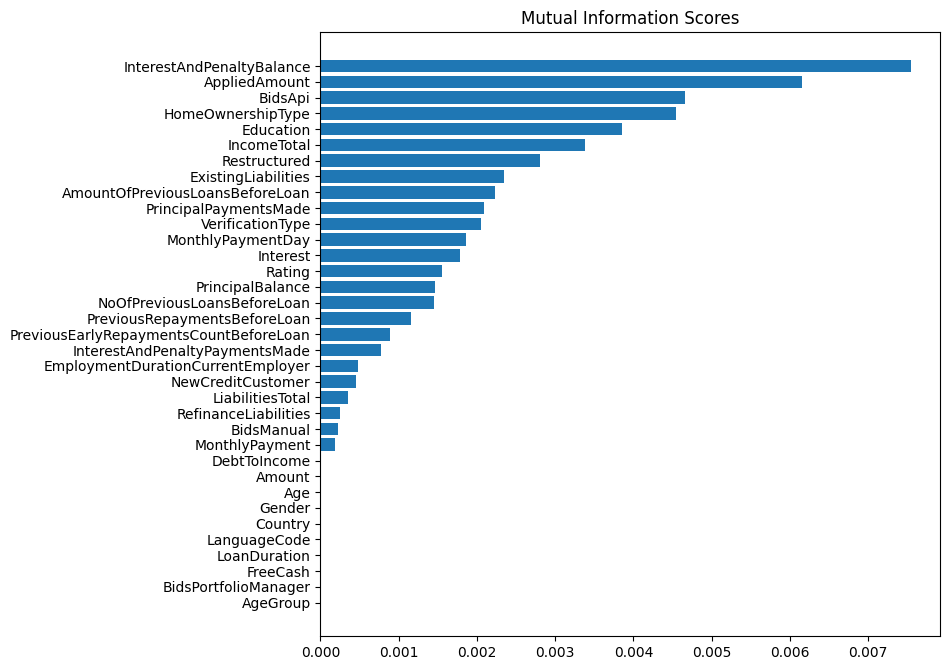

In [ ]:
plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

## **4. Handing Outliers:**

In [ ]:
# Dustribution Before Handling Outliers
X[outliers_cols].describe()

,Interest,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,DebtToIncome,FreeCash,InterestAndPenaltyBalance,PreviousEarlyRepaymentsCountBeforeLoan,RefinanceLiabilities,BidsPortfolioManager,BidsApi,BidsManual,MonthlyPayment
count,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000
mean,29.913080,1527.973334,2.952849,354.913541,333.241858,468.927808,1.957417,3811.408472,2.025020,23.409092,6.056837,0.059648,0.034497,620.964995,24.160882,554.321362,105.046335
std,17.184065,2477.264378,3.313259,1226.279040,654.100096,825.562760,2.750272,5078.599057,9.216263,369.656875,52.580527,0.321914,0.377524,971.618839,129.660918,641.063762,87.699052
min,7.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.100000,840.000000,1.000000,37.000000,43.650000,52.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,163.500000,31.140000
50%,27.070000,1200.000000,2.000000,235.000000,127.910000,171.340000,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,277.000000,0.000000,349.000000,90.730000
75%,37.500000,1800.000000,4.000000,485.575000,323.590000,514.950000,3.000000,5845.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.000000,5.000000,712.000000,143.785000
max,240.560000,235800.000000,40.000000,250100.000000,10368.630000,16873.000000,25.000000,53762.000000,75.610000,82063.820000,2517.090000,8.000000,18.000000,10625.000000,5565.000000,10630.000000,1284.220000


In [ ]:
outliers_type1 = ['Interest', 'MonthlyPayment', 'ExistingLiabilities', 'NoOfPreviousLoansBeforeLoan', 
                  'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'AmountOfPreviousLoansBeforeLoan',
                  'InterestAndPenaltyPaymentsMade', 'PrincipalPaymentsMade', 'LiabilitiesTotal', 'IncomeTotal'] # --> median
outliers_type2 = ['DebtToIncome', 'RefinanceLiabilities', 'PreviousEarlyRepaymentsCountBeforeLoan', 
                  'InterestAndPenaltyBalance', 'FreeCash'] # main value is 0


In [ ]:
X[outliers_type1].describe()

,Interest,MonthlyPayment,ExistingLiabilities,NoOfPreviousLoansBeforeLoan,BidsPortfolioManager,BidsApi,BidsManual,AmountOfPreviousLoansBeforeLoan,InterestAndPenaltyPaymentsMade,PrincipalPaymentsMade,LiabilitiesTotal,IncomeTotal
count,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000
mean,29.913080,105.046335,2.952849,1.957417,620.964995,24.160882,554.321362,3811.408472,468.927808,333.241858,354.913541,1527.973334
std,17.184065,87.699052,3.313259,2.750272,971.618839,129.660918,641.063762,5078.599057,825.562760,654.100096,1226.279040,2477.264378
min,7.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.100000,31.140000,1.000000,0.000000,106.000000,0.000000,163.500000,0.000000,52.490000,43.650000,37.000000,840.000000
50%,27.070000,90.730000,2.000000,1.000000,277.000000,0.000000,349.000000,2000.000000,171.340000,127.910000,235.000000,1200.000000
75%,37.500000,143.785000,4.000000,3.000000,682.000000,5.000000,712.000000,5845.000000,514.950000,323.590000,485.575000,1800.000000
max,240.560000,1284.220000,40.000000,25.000000,10625.000000,5565.000000,10630.000000,53762.000000,16873.000000,10368.630000,250100.000000,235800.000000


In [ ]:
# 1st: Identify Outliers (done in EDA) --> Create a DF 
outliers_1 = pd.DataFrame(outliers_type1, columns=['features'])

# 2nd: Setup necessary replacement values
outliers_1['median'] = outliers_1['features'].map(lambda col: X[col].quantile(0.5))

# 3rd: Set up the upper bound
upper = {'Interest':70, 'MonthlyPayment':350, 'ExistingLiabilities':8, 'NoOfPreviousLoansBeforeLoan':7, 
                  'BidsPortfolioManager':1600, 'BidsApi':12, 'BidsManual': 1600,
          'AmountOfPreviousLoansBeforeLoan':14000, 'InterestAndPenaltyPaymentsMade':1200,
          'PrincipalPaymentsMade':750, 'LiabilitiesTotal':1200, 'IncomeTotal':3500}
outliers_1['upper'] = outliers_1['features'].apply(lambda x: upper[x])

outliers_1.shape

(12, 3)

In [ ]:
# Replacing outliers
for col in outliers_type1:
  # Extract upper value
  upper_v = outliers_1[outliers_1['features']==col]['upper'].values[0]

  # Extract median
  value = outliers_1[outliers_1['features'] == col]['median'].values[0]
  #print(f"Value = {value}")

  # Determine an array of the outliers values
  out = [ v for v in X[col].values if v > upper_v]

  # Replace outliers with upper_bound, and lowe_bound values
  for v in out:
    X[col] = X[col].replace(v, value)

In [ ]:
X[outliers_type1].describe()

,Interest,MonthlyPayment,ExistingLiabilities,NoOfPreviousLoansBeforeLoan,BidsPortfolioManager,BidsApi,BidsManual,AmountOfPreviousLoansBeforeLoan,InterestAndPenaltyPaymentsMade,PrincipalPaymentsMade,LiabilitiesTotal,IncomeTotal
count,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000
mean,27.404302,98.339154,2.266037,1.437700,358.775969,1.147020,420.694233,2980.528341,237.631920,159.868035,282.021785,1327.623195
std,13.454964,72.986159,2.074564,1.779384,347.388670,2.602655,359.751421,3711.600171,262.711715,158.961148,274.795428,667.642438
min,7.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.100000,31.140000,1.000000,0.000000,106.000000,0.000000,163.500000,0.000000,52.490000,43.650000,37.000000,840.000000
50%,27.070000,90.730000,2.000000,1.000000,277.000000,0.000000,349.000000,2000.000000,171.340000,127.910000,235.000000,1200.000000
75%,36.620000,138.340000,3.000000,2.000000,482.000000,0.000000,575.000000,4500.000000,311.765000,211.625000,433.775000,1700.000000
max,69.940000,349.790000,8.000000,7.000000,1600.000000,12.000000,1600.000000,14000.000000,1199.710000,750.000000,1200.000000,3500.000000


In [ ]:
def plot_num_outlier(col):
  '''
  Plotting Univariant visualization of Numerical features after Handling outliers
  '''
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  sns.boxplot(X[col], ax=ax[0], showfliers=False, color="lightblue")
  sns.distplot(X[col], ax=ax[1], kde=False, bins=40)
  plt.title(f'{col} Distribution')

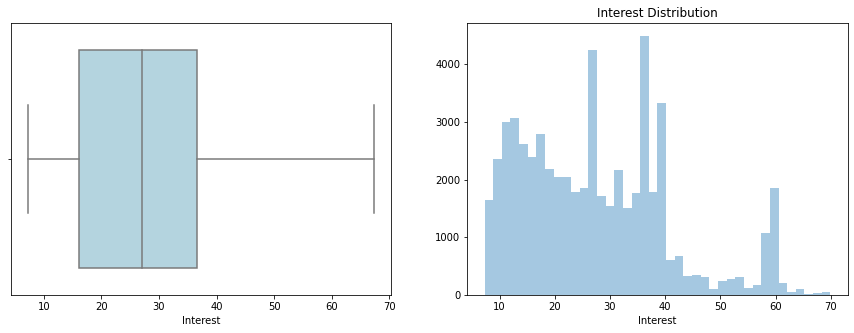

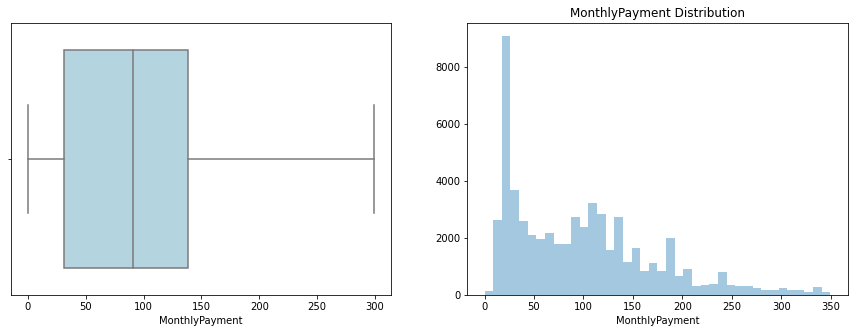

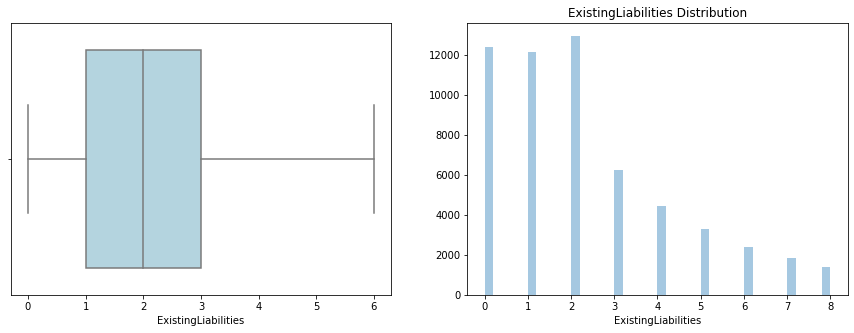

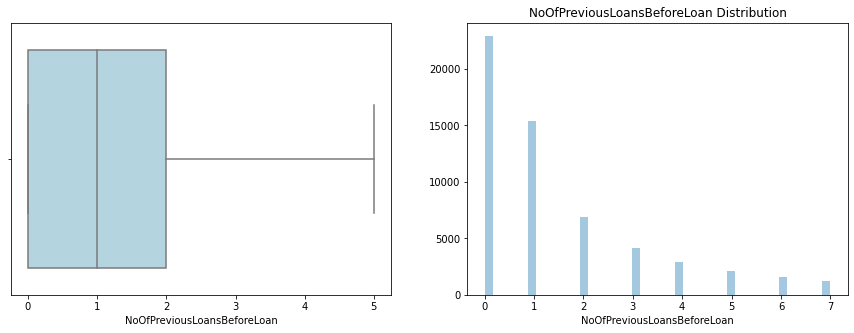

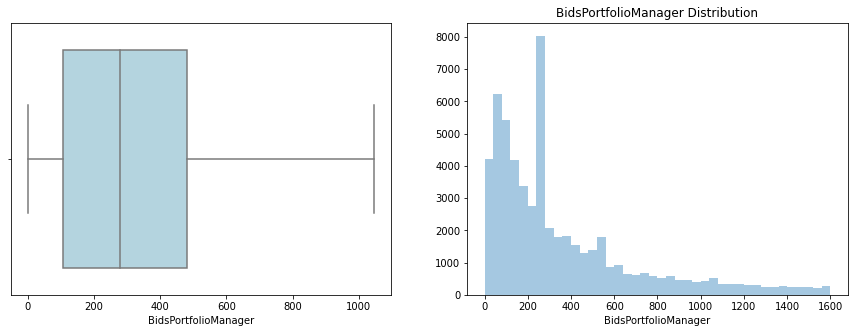

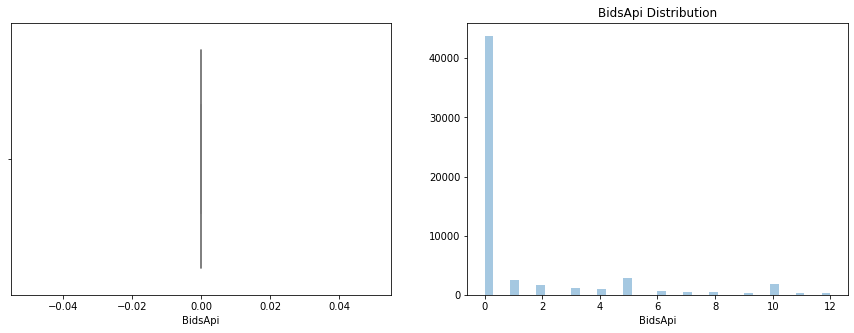

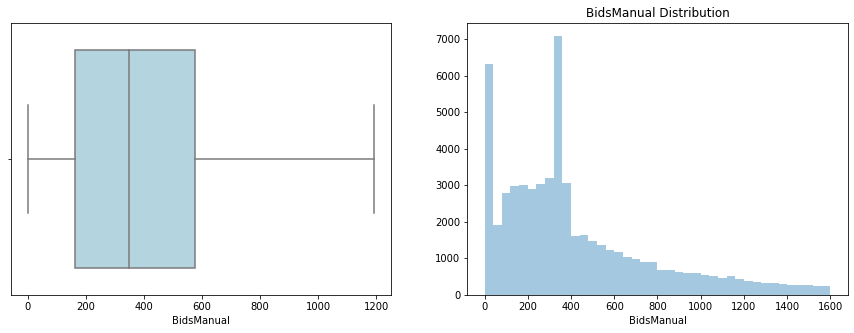

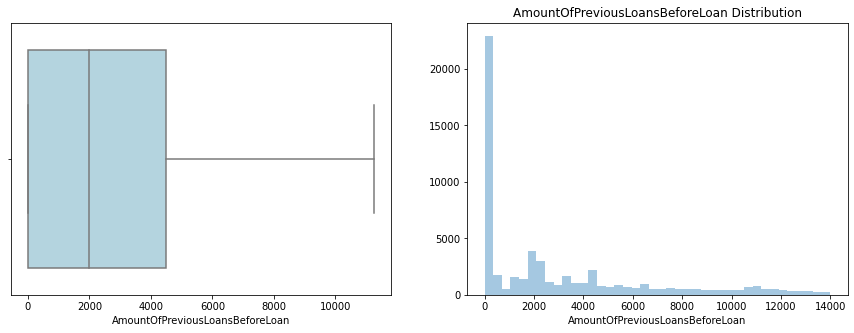

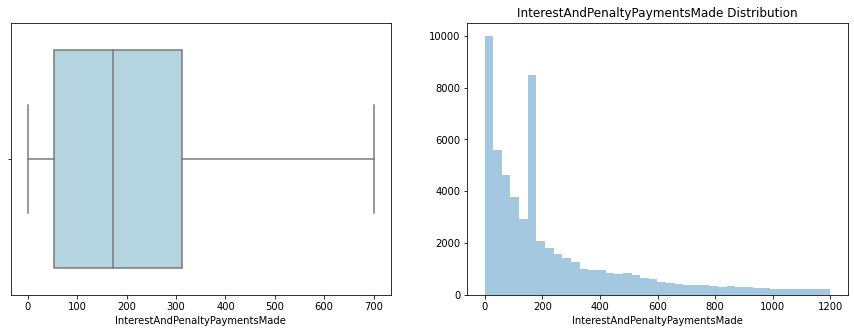

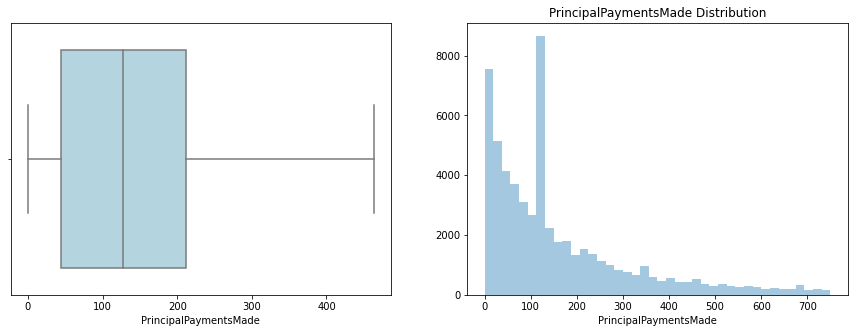

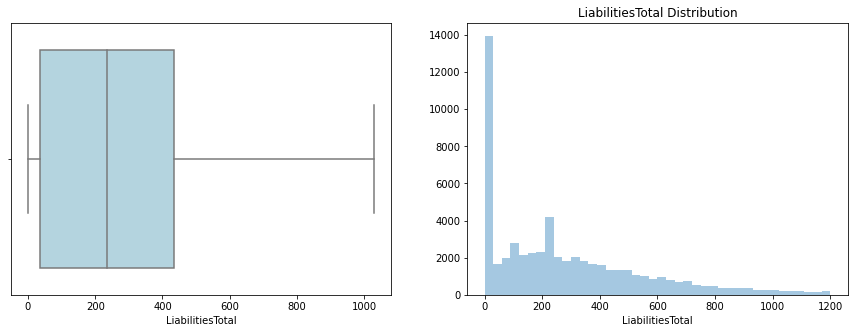

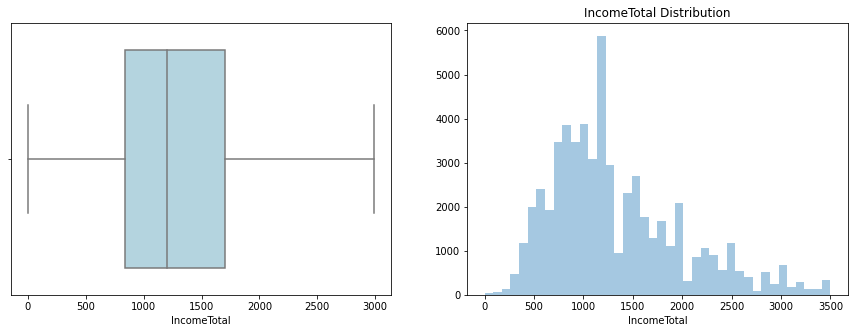

In [ ]:
for col in outliers_type1:
  # Plot uni Categorical
  plot_num_outlier(col)

**Test with Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 30, stratify=y)

clf_1 = LogisticRegression(random_state=30)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)

print(f" Model Scoring: {clf_1.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9978997112102914
 Confusion Matrix:
 [[11403    24]
 [    0     0]]


- After Handling outliers, The score of the model has improved.

In [ ]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Interest                                  0.007048
Rating                                    0.004641
LiabilitiesTotal                          0.003404
DebtToIncome                              0.003138
BidsManual                                0.002170
AmountOfPreviousLoansBeforeLoan           0.001450
PreviousRepaymentsBeforeLoan              0.000773
RefinanceLiabilities                      0.000388
HomeOwnershipType                         0.000000
MonthlyPayment                            0.000000
Gender                                    0.000000
PreviousEarlyRepaymentsCountBeforeLoan    0.000000
Name: MI Scores, dtype: float64

## **5. Creating Features**

In [ ]:
# Average Loan Amount Per Country
X['AvgAmountCountry'] = ( X.groupby('Country')['Amount'].transform("mean"))

In [ ]:
# Average Loan Amount Per Home Ownership Type
X['AvgAmountHomeOwnershipType'] = ( X.groupby('HomeOwnershipType')['Amount'].transform('mean'))

In [ ]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

AvgAmountHomeOwnershipType         0.009067
AgeGroup                           0.004149
AmountOfPreviousLoansBeforeLoan    0.003411
InterestAndPenaltyBalance          0.002143
BidsApi                            0.001990
NoOfPreviousLoansBeforeLoan        0.001567
Gender                             0.000949
RefinanceLiabilities               0.000576
Restructured                       0.000342
VerificationType                   0.000000
Rating                             0.000000
NewCreditCustomer                  0.000000
BidsManual                         0.000000
Name: MI Scores, dtype: float64

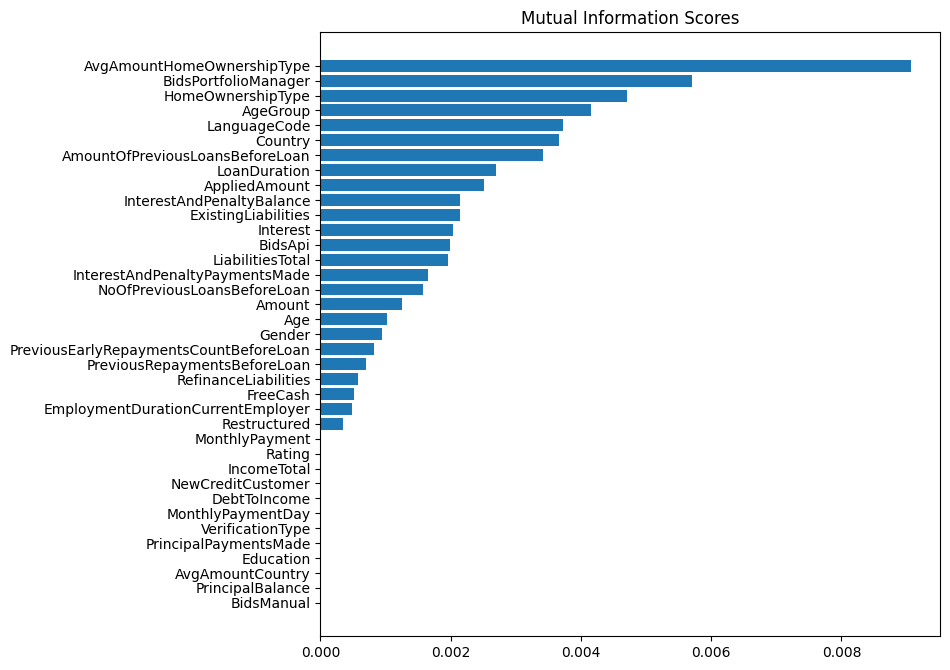

In [ ]:
plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 30, stratify=y)

clf_2 = LogisticRegression(random_state=30)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)

print(f" Model Scoring: {clf_2.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9978997112102914
 Confusion Matrix:
 [[11403    24]
 [    0     0]]


## **6. Correlations:**

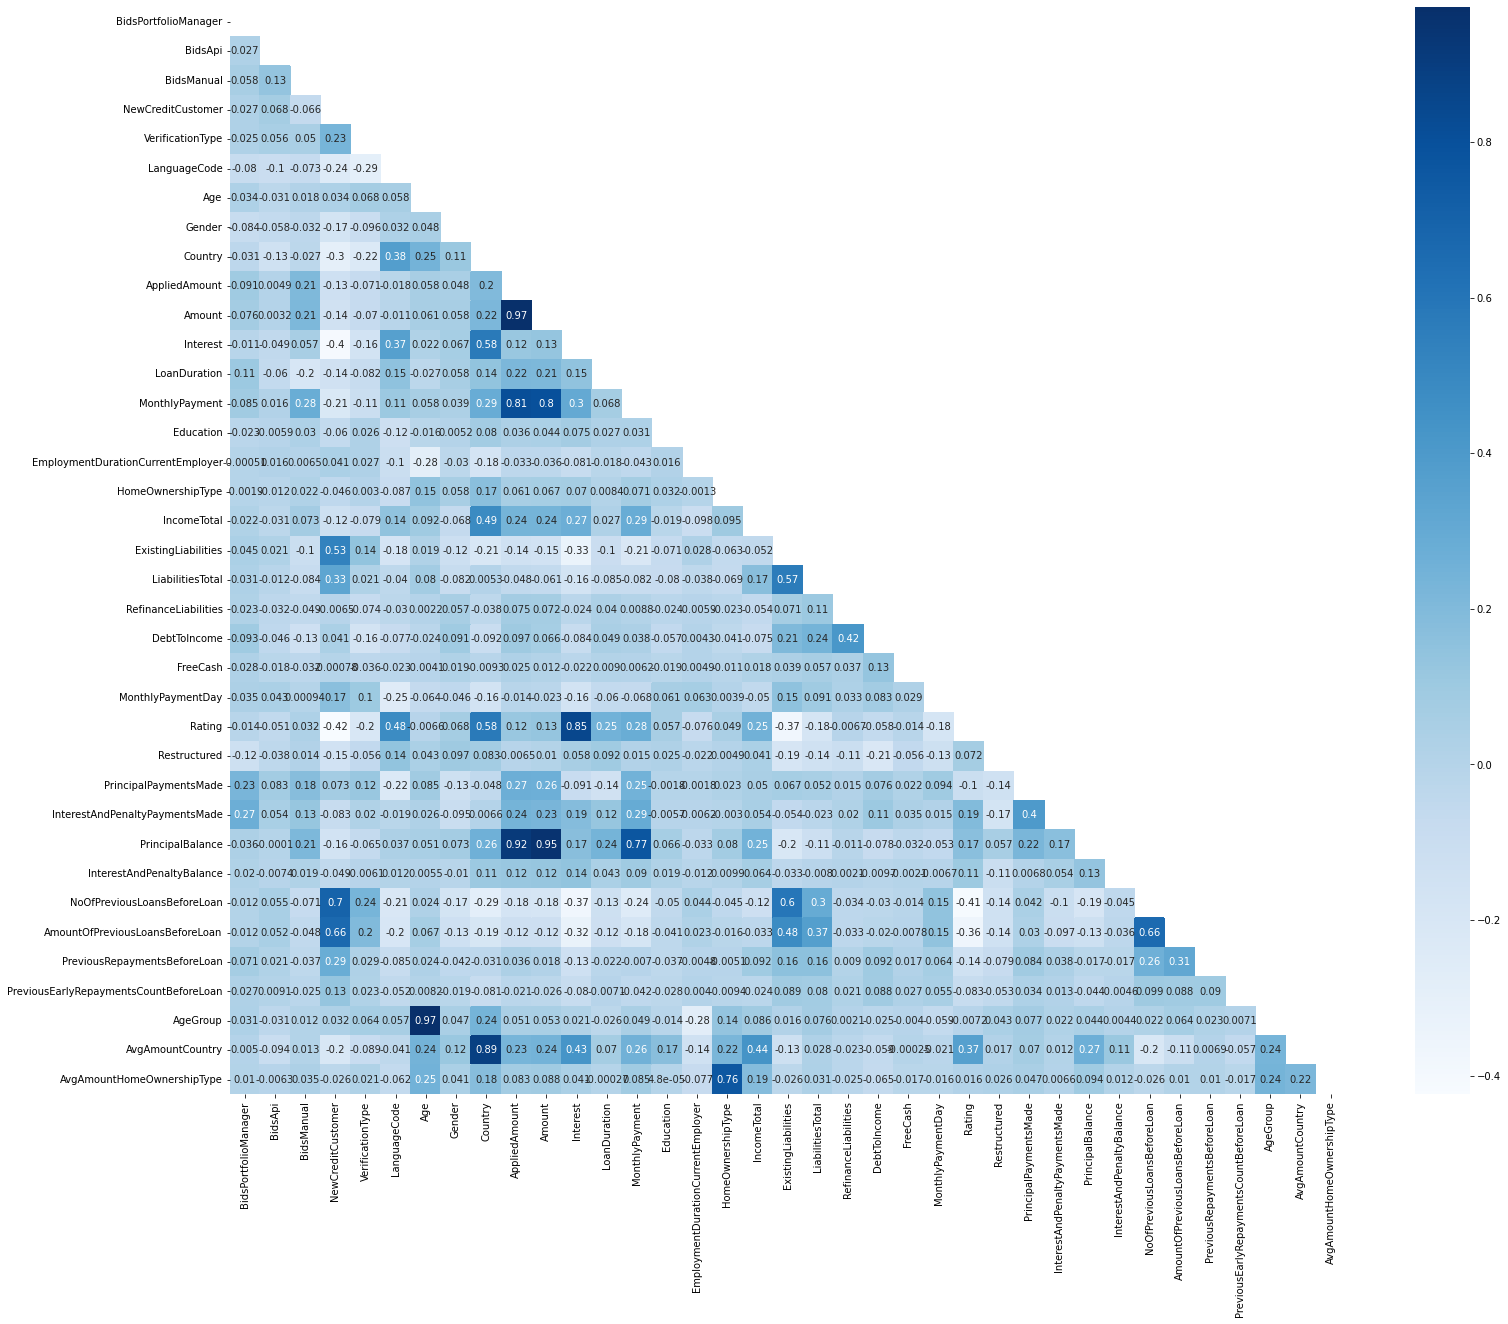

In [ ]:
# Checking Coreelation of the data
corr= X.corr()
matrix = np.triu(X.corr())
plt.figure(figsize=(25,20))
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr, annot=True, mask=matrix,cmap='Blues')

**Correlation Notes:**
1. With Target Value (**defaulted**):


There's no evident correlation bwteen target value, and data attributes, since binary classification problem.

2. Among the Data Attributes:

* **Positive Correlations:**
> * PrincipleBalance, and [Amount, AppliedAmount]
>
> * MonthlyPayment, and [Amount, AppliedAmount]
>
> * NoOfPreviousLoansBeforeLoan, and [AmountOfPreviousLoansBeforeLoan, ExisitingLiabilities]
>
> * MonthlyPayment, and PrincipleBalance
>
> * BidsPortofolioManager, and [PrinciplePaymentsMade, InterestAndPenaltyAndPaymentsMade]

* **Negative Correlations**:
> There's no severe negative correlations.




Solution: 
- Drop --> [Amount, AppliedAmount, PrincipleBalance]

In [ ]:
X.drop(['Amount', 'AppliedAmount', 'PrincipalBalance'], axis=1, inplace=True)
X.shape

(57135, 34)

## **7. Feature Selection:**

**Handling Non-Positive Data**

In [ ]:
neg_cols = [col for col in X.columns.tolist() if (X[col].values < 0).any()]
print(neg_cols)

['FreeCash']


In [ ]:
X['FreeCash'].replace({-26.48:26.48}, inplace=True)
X[X['FreeCash']<0] 

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,Interest,LoanDuration,MonthlyPayment,Education,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,AgeGroup,AvgAmountCountry,AvgAmountHomeOwnershipType


**Setting Base score**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 30, stratify=y)

clf_3 = LogisticRegression(random_state=30)
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)

print(f" Model Scoring: {clf_3.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9978997112102914
 Confusion Matrix: [[11403    24]
 [    0     0]]


**SelectKBest with chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Scoring Best features without Smoothing
best_1 = SelectKBest(score_func=chi2, k=10)
fit_1 = best_1.fit(X, y)
dfcolumns_1 = pd.DataFrame(X.columns)
dfscores_1 = pd.DataFrame(fit_1.scores_)
featureScores_1 = pd.concat([dfcolumns_1, dfscores_1], axis=1)
featureScores_1.columns = ['Specs', 'Score']
featureScores_1.sort_values(by='Score', ascending=False,
                       inplace=True)
featureScores_1.reset_index(inplace=True)
featureScores_1.drop('index', axis=1, inplace=True)
featureScores_1

,Specs,Score
0,FreeCash,241090.580755
1,AmountOfPreviousLoansBeforeLoan,83132.964282
2,AvgAmountCountry,20832.884153
3,LiabilitiesTotal,14911.063172
4,IncomeTotal,11396.782425
5,DebtToIncome,8569.644707
6,InterestAndPenaltyPaymentsMade,8137.251076
7,PrincipalPaymentsMade,7112.834971
8,BidsPortfolioManager,5682.095043
9,InterestAndPenaltyBalance,4955.242294


**ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.03853006 0.01890308 0.04620782 0.01244499 0.02267825 0.01779925
 0.04441063 0.02296189 0.00899021 0.04692603 0.03256841 0.04593885
 0.03043344 0.0359147  0.02938854 0.04956951 0.03530839 0.04061549
 0.02045262 0.02854964 0.03119721 0.04642025 0.03494451 0.01645307
 0.04689099 0.03711537 0.01668769 0.01690834 0.02291325 0.02644867
 0.00408527 0.03250094 0.00990913 0.0289335 ]


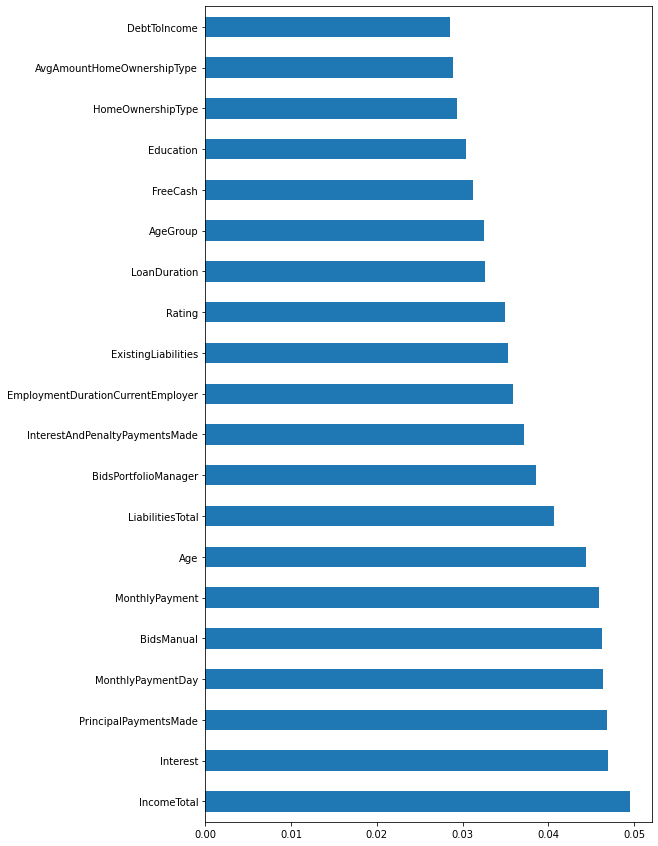

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,15))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

In [ ]:
best_tree = feat_importances.nlargest(10).index.tolist()
best_chi2 = featureScores_1['Specs'][:10,].values.tolist()
best_cols = best_tree

for col in best_chi2:
  best_cols.append(col)

best_cols = list(set(best_cols))
len(best_cols)

15

**Scoring with the top features**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X[best_cols], y, test_size = 0.2, random_state = 30, stratify=y)

clf_4 = LogisticRegression(random_state=30)
clf_4.fit(X_train, y_train)
y_pred = clf_4.predict(X_test)

print(f" Model Scoring: {clf_4.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9978997112102914
 Confusion Matrix:
 [[11403    24]
 [    0     0]]


### **Normalization:**

In [ ]:
from sklearn.preprocessing import Normalizer

scale = Normalizer()

X_1 = scale.fit_transform(X)

**SelectKBest with chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Scoring Best features without Smoothing
best_2 = SelectKBest(score_func=chi2, k=10)
fit_2 = best_1.fit(X_1, y)
dfcolumns_2 = pd.DataFrame(X.columns)
dfscores_2 = pd.DataFrame(fit_2.scores_)
featureScores_2 = pd.concat([dfcolumns_2, dfscores_2], axis=1)
featureScores_2.columns = ['Specs', 'Score']
featureScores_2.sort_values(by='Score', ascending=False,
                       inplace=True)
featureScores_2.reset_index(inplace=True)
featureScores_2.drop('index', axis=1, inplace=True)
featureScores_2

,Specs,Score
0,FreeCash,49.983159
1,AmountOfPreviousLoansBeforeLoan,9.534893
2,LiabilitiesTotal,4.327755
3,AvgAmountCountry,2.796034
4,DebtToIncome,2.059203
5,IncomeTotal,1.592312
6,InterestAndPenaltyPaymentsMade,1.334837
7,PrincipalPaymentsMade,1.202609
8,BidsPortfolioManager,1.121146
9,InterestAndPenaltyBalance,0.841400


**ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_1, y)
print(model.feature_importances_)

[0.03404784 0.01853697 0.03648045 0.01515448 0.03116119 0.0333291
 0.03557032 0.02346396 0.03384553 0.03738193 0.03544886 0.03672959
 0.03480634 0.03213907 0.03259328 0.03631458 0.03315798 0.03730173
 0.02147418 0.02450715 0.02724619 0.03722138 0.03722215 0.02280832
 0.04124822 0.04071123 0.01660929 0.01520806 0.01731524 0.02618895
 0.00348869 0.02943697 0.03145507 0.03039573]


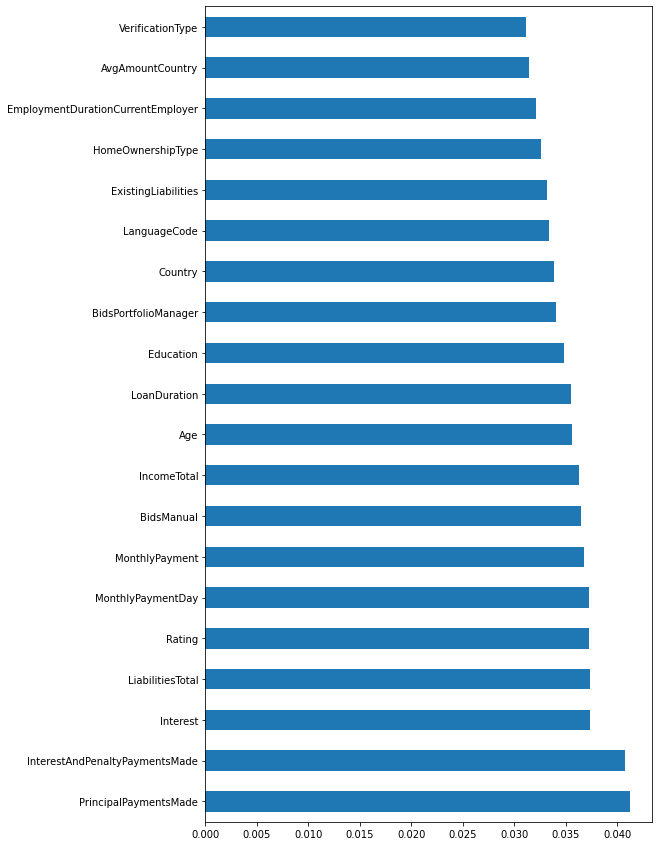

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,15))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

In [ ]:
best_tree = feat_importances.nlargest(10).index.tolist()
best_chi2 = featureScores_2['Specs'][:10,].values.tolist()
best_cols_1 = best_tree

for col in best_chi2:
  best_cols_1.append(col)

best_cols_1 = list(set(best_cols))
len(best_cols_1)

15

In [ ]:
print(best_cols)
print(best_cols_1)

['PrincipalPaymentsMade', 'MonthlyPaymentDay', 'AmountOfPreviousLoansBeforeLoan', 'IncomeTotal', 'BidsManual', 'BidsPortfolioManager', 'LiabilitiesTotal', 'DebtToIncome', 'InterestAndPenaltyBalance', 'MonthlyPayment', 'Age', 'InterestAndPenaltyPaymentsMade', 'Interest', 'FreeCash', 'AvgAmountCountry']
['PrincipalPaymentsMade', 'MonthlyPaymentDay', 'AmountOfPreviousLoansBeforeLoan', 'IncomeTotal', 'BidsManual', 'BidsPortfolioManager', 'LiabilitiesTotal', 'DebtToIncome', 'InterestAndPenaltyBalance', 'MonthlyPayment', 'Age', 'InterestAndPenaltyPaymentsMade', 'Interest', 'FreeCash', 'AvgAmountCountry']


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_1, y, test_size = 0.2, random_state = 30, stratify=y)

clf_5 = LogisticRegression(random_state=30)
clf_5.fit(X_train, y_train)
y_pred = clf_5.predict(X_test)

print(f" Model Scoring: {clf_5.score(X_test, y_test)}")
print(f" Confusion Matrix:\n {confusion_matrix(y_pred, y_test)}")

 Model Scoring: 0.9978997112102914
 Confusion Matrix:
 [[11403    24]
 [    0     0]]
